# **Анализ объявлений о недвижимости на Krisha.kz**

## **Цель проекта:**

Провести анализ данных о недвижимости, собранных с Krisha.kz, чтобы выявить тренды, паттерны и инсайты по ценам, локациям и характеристикам недвижимости.

### **Этап 1: Настройка среды**

* Установите необходимые библиотеки:

In [1]:
# Your code goes here
!pip install selenium




[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


* Импортируйте библиотеки в скрипт Python или Jupyter Notebook:

In [150]:
# Your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC



In [151]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

In [152]:
from selenium.common.exceptions import NoSuchElementException

In [153]:
from bs4 import BeautifulSoup
import copy

In [154]:
import re
import time
import random

### **Этап 2: Сбор данных с Krisha.kz**
1. Анализ структуры сайта:
  * Откройте Krisha.kz и изучите структуру HTML-кода с помощью инструментов разработчика (ПКМ > Исследовать элемент).
  * Найдите HTML-теги, содержащие данные:
    * Название объекта (например, "2-комнатная квартира")
    * Цена
    * Расположение
    * Количество комнат
    * Площадь (м²)
    * Дополнительные параметры (этаж, год постройки и т.д.)
  * Отправка HTTP-запросов:
    * Используйте requests для отправки запросов.
    * Настройте скрипт для работы с пагинацией.
    * Не забудьте приостанавливать скрипт



In [77]:
# Your code goes here
driver = webdriver.Chrome()
base_url = "https://krisha.kz/prodazha/kvartiry/almaty/"
driver.get(base_url)

data = []

while len(data) < 5000:
    items = driver.find_elements(By.CLASS_NAME, "a-card__inc")
    
    for item in items:
        try:
            title = item.find_element(By.CLASS_NAME, "a-card__title").text
            
            price = item.find_element(By.CLASS_NAME, "a-card__price").text
            cleaned_price = re.sub(r"[^0-9]", "", price)
            price = int(cleaned_price) if cleaned_price else np.Nan
            
            location = item.find_element(By.CLASS_NAME, "a-card__stats-item").text
            details = item.find_element(By.CLASS_NAME, "a-card__text-preview").text
            agent = WebDriverWait(item, 10).until(
                EC.presence_of_element_located((By.XPATH, '//span//div[contains(@class, "label-user-agent")]'))).text

            date_publishing = item.find_element(By.XPATH, './/div[contains(@class, "a-card__stats-item")][2]').text
            try:
                watched = item.find_element(By.CSS_SELECTOR, 'span.a-view-count.status-item').text
            except:
                watched = np.nan
            
                
            try:
                district = item.find_element(By.CLASS_NAME, 'a-card__subtitle.tm-click-checked-hot-adv').text
                if "р-н," in district:
                    district = district.split("р-н,")[0].strip()
                else:
                    district = np.nan
            except NoSuchElementException:
                district = np.nan 

                    #if "р-н," in location_text:
                    #district = location_text.split("р-н,")[0].strip() + "р-н"
                #else:
                    #district = np.nan

            try:
                preview_text = item.find_element(By.CLASS_NAME, 'a-card__text-preview').text
                year_pattern = r"(\d{4})\sг\.п\."
                match = re.search(year_pattern, preview_text)
                year_built = int(match.group(1)) if match else np.nan
            except Exception as e:
                year_built = np.nan
                print(f"Ошибка при извлечении года постройки: {e}")


            rooms, area = title.split(" · ")[0][0], title.split(" · ")[1]

            try:
                floor_text = title.split(" · ")[2]
                if "/" in floor_text:
                    floor = int(floor_text.split('/')[0])
                else:
                    floor = int(floor_text.split(' ')[0])
            except:
                floor = np.nan
   
            
            data.append({
                "Название": title,
                "Цена(тенге)": price,
                "Расположение": location,
                'Район': district,
                'Год постройки': year_built,
                "Количество комнат": rooms,
                "Площадь(кв.м)": float(area.split(' ')[0]),
                "Этаж": floor,
                "Агент": agent,
                "Дата": date_publishing,
                "Просмотрено": watched
            })
            time.sleep(random.uniform(1, 3))
        except Exception as e:
            print(f"Ошибка: {e}")

    if len(data) >= 5001:
        break
    
    #try:
        #next_button = driver.find_element(By.CLASS_NAME, "paginator__btn paginator__btn--next")
        #next_button.click()
        #time.sleep(1)  # Задержка, чтобы избежать блокировки
    try:
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CLASS_NAME, "paginator__btn--next"))
        )
        
        driver.execute_script("arguments[0].click();", next_button)
        
        WebDriverWait(driver, 10).until(
            EC.staleness_of(items[0])
        )
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CLASS_NAME, "a-card__inc"))
        )
        time.sleep(random.uniform(1, 3))
    except:
        print("Больше нет страниц.")
        break

df = pd.DataFrame(data)

df.to_csv("krisha_data.csv", index=False)
time.sleep(random.uniform(1, 3))

driver.quit()




Ошибка: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF603466CB5+28821]
	(No symbol) [0x00007FF6033D3840]
	(No symbol) [0x00007FF60327578A]
	(No symbol) [0x00007FF6032C91BE]
	(No symbol) [0x00007FF6032C94AC]
	(No symbol) [0x00007FF6032BC52C]
	(No symbol) [0x00007FF6032EF33F]
	(No symbol) [0x00007FF6032BC3F6]
	(No symbol) [0x00007FF6032EF510]
	(No symbol) [0x00007FF60330F412]
	(No symbol) [0x00007FF6032EF0A3]
	(No symbol) [0x00007FF6032BA778]
	(No symbol) [0x00007FF6032BB8E1]
	GetHandleVerifier [0x00007FF60379FCAD+3408013]
	GetHandleVerifier [0x00007FF6037B741F+3504127]
	GetHandleVerifier [0x00007FF6037AB5FD+3455453]
	GetHandleVerifier [0x00007FF60352BDBB+835995]
	(No symbol) [0x00007FF6033DEB5F]
	(No symbol) [0x00007FF6033DA814]
	(No symbol) [0x00007FF6033DA9AD]
	(No symbol) [0x00007FF6033CA199]
	BaseThreadInitThunk [0x00007FFD1C607374+20]
	RtlUserThreadStart [0x00007FFD1DA7CC91+33]

Ошибка: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF603466CB5+28821]
	(No symbol) [0x00007FF

KeyboardInterrupt: 

In [88]:
driver = webdriver.Chrome()
base_url = "https://krisha.kz/prodazha/kvartiry/almaty/"
driver.get(base_url)

data = []
seen_items = set()  # Для отслеживания уникальных объявлений

while len(data) < 5000:
    items = driver.find_elements(By.CLASS_NAME, "a-card__inc")
    
    for item in items:
        try:
            title = item.find_element(By.CLASS_NAME, "a-card__title").text
            if title in seen_items:  # Пропускаем повторяющиеся объявления
                continue
            seen_items.add(title)
            
            price = item.find_element(By.CLASS_NAME, "a-card__price").text
            cleaned_price = re.sub(r"[^0-9]", "", price)
            price = int(cleaned_price) if cleaned_price else np.nan
            
            location = item.find_element(By.CLASS_NAME, "a-card__stats-item").text
            details = item.find_element(By.CLASS_NAME, "a-card__text-preview").text
            #agent = item.find_element(By.XPATH, '//span//div[contains(@class, "label-user-agent")]').text # a-card__complex-label

            rooms, area = title.split(" · ")[0][0], title.split(" · ")[1]

            try:
                preview_text = item.find_element(By.CLASS_NAME, 'a-card__text-preview').text
                year_pattern = r"(\d{4})\sг\.п\."
                match = re.search(year_pattern, preview_text)
                year_built = int(match.group(1)) if match else np.nan
            except Exception as e:
                year_built = np.nan
                print(f"Ошибка при извлечении года постройки: {e}")

            try:
                floor_text = title.split(" · ")[2]
                floor = int(floor_text.split('/')[0]) if "/" in floor_text else int(floor_text.split(' ')[0])
            except:
                floor = np.nan

            date_publishing = item.find_element(By.XPATH, './/div[contains(@class, "a-card__stats-item")][2]').text
            try:
                watched = item.find_element(By.CSS_SELECTOR, 'span.a-view-count.status-item').text
            except:
                watched = np.nan

            try:
                district = item.find_element(By.CLASS_NAME, 'a-card__subtitle.tm-click-checked-hot-adv').text
                if "р-н," in district:
                    district = district.split("р-н,")[0].strip()
                else:
                    district = np.nan
            except NoSuchElementException:
                district = np.nan 
            
            data.append({
                "Название": title,
                "Цена(тенге)": price,
                "Расположение": location,
                'Район': district,
                'Год постройки': year_built,
                "Количество комнат": rooms,
                "Площадь(кв.м)": float(area.split(' ')[0]),
                "Этаж": floor,
                #"Агент": agent,
                "Дата": date_publishing,
                "Просмотрено": watched
            })
        except Exception as e:
            print(f"Ошибка при обработке элемента: {e}")
    
    # Сохраняем каждые 100 записей
    if len(data) % 100 == 0:
        pd.DataFrame(data).to_csv("krisha_partial_data.csv", index=False)
        print(f"Сохранено {len(data)} записей в krisha_partial_data.csv")
    
    # Переход на следующую страницу
    try:
        current_page_content = driver.page_source
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CLASS_NAME, "paginator__btn--next"))
        )
        driver.execute_script("arguments[0].click();", next_button)
        
        WebDriverWait(driver, 10).until(
            lambda d: d.page_source != current_page_content  # Проверяем обновление страницы
        )
        print("Переход на следующую страницу выполнен.")
        time.sleep(random.uniform(1, 3))
    except Exception as e:
        print("Больше нет страниц или ошибка при переходе:", e)
        break

# Финальное сохранение
df = pd.DataFrame(data)
df.to_csv("krisha_data_apartments.csv", index=False)
print("Сохранение завершено. Всего записей:", len(data))

driver.quit()


Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.


In [89]:
df

Название  Цена(тенге) Расположение  \
0      2-комнатная квартира · 51 м² · 17/17 этаж     35500000       Алматы   
1      4-комнатная квартира · 149 м² · 8/16 этаж    119900000       Алматы   
2       2-комнатная квартира · 55 м² · 8/12 этаж     42000000       Алматы   
3        3-комнатная квартира · 60 м² · 3/4 этаж     30000000       Алматы   
4      3-комнатная квартира · 85 м² · 11/16 этаж     46500000       Алматы   
...                                          ...          ...          ...   
4998  1-комнатная квартира · 32.72 м² · 8/9 этаж     15739000       Алматы   
4999  3-комнатная квартира · 89.2 м² · 3/13 этаж     82000000       Алматы   
5000    2-комнатная квартира · 94 м² · 4/21 этаж     69000000       Алматы   
5001   2-комнатная квартира · 53.2 м² · 3/5 этаж     30000000       Алматы   
5002   3-комнатная квартира · 80 м² · 18/20 этаж     46000000       Алматы   

              Район  Год постройки Количество комнат  Площадь(кв.м)  Этаж  \
0        Ауэзовский         2016.0                 2          51.00  17.0   
1     Бостандыкский         2008.0                 4         149.00   8.0   
2     Бостандыкский         2021.0                 2          55.00   8.0   
3               NaN         1976.0                 3          60.00   3.0   
4               NaN         2022.0                 3          85.00  11.0   
...             ...            ...               ...            ...   ...   
4998            NaN         2024.0                 1          32.72   8.0   
4999            NaN         2021.0                 3          89.20   3.0   
5000            NaN         2012.0                 2          94.00   4.0   
5001            NaN         1986.0                 2          53.20   3.0   
5002            NaN         2024.0                 3          80.00  18.0   

          Дата Просмотрено  
0     24 нояб.         269  
1     24 нояб.         178  
2     24 нояб.         180  
3     24 нояб.        1253  
4     24 нояб.          99  
...        ...         ...  
4998  23 нояб.         133  
4999  23 нояб.        1126  
5000  23 нояб.         786  
5001  23 нояб.        1425  
5002  23 нояб.         807  

[5003 rows x 10 columns]

In [97]:
# Открытие страницы
driver = webdriver.Chrome()
base_url = "https://krisha.kz/prodazha/doma-dachi/almaty/"
driver.get(base_url)

# Хранение данных
data = []
seen_items = set()  

# Логика для сбора 5000 объявлений
while len(data) < 5000:
        
    #try:
    #    # Явное ожидание загрузки всех карточек
    #    WebDriverWait(driver, 10).until(
    #        EC.presence_of_all_elements_located((By.CLASS_NAME, "a-card__inc"))
    #    )
        
        # Найдите все объявления на странице
    items = driver.find_elements(By.CLASS_NAME, "a-card__inc")
        
    for item in items:
            try:
                title = item.find_element(By.CLASS_NAME, "a-card__title").text
                price = item.find_element(By.CLASS_NAME, "a-card__price").text
                location = item.find_element(By.CLASS_NAME, "a-card__stats-item").text
                details = item.find_element(By.CLASS_NAME, "a-card__subtitle").text

                if title in seen_items:  # Пропускаем повторяющиеся объявления
                    continue
                seen_items.add(title)
            
                cleaned_price = re.sub(r"[^0-9]", "", price)
                price = int(cleaned_price) if cleaned_price else np.nan


                # Обработка деталей
                split_details = title.split(" · ")
                rooms = split_details[1].split()[0] if len(split_details) > 1 else np.nan
                area = split_details[2].split()[0] if len(split_details) > 2 else np.nan
                land = split_details[3].split()[0] if len(split_details) > 3 else np.nan

                try:
                    district = item.find_element(By.CLASS_NAME, 'a-card__subtitle.tm-click-checked-hot-adv').text
                    if "р-н," in district:
                        district = district.split("р-н,")[0].strip()
                    else:
                        district = np.nan
                except NoSuchElementException:
                    district = np.nan
                
                # Дата публикации
                try:
                    date_publishing = item.find_element(By.XPATH, './/div[contains(@class, "a-card__stats-item")][2]').text
                except NoSuchElementException:
                    date_publishing = np.nan

                
                
                # Просмотры
                try:
                    watched = item.find_element(By.CSS_SELECTOR, 'span.a-view-count.status-item').text
                except:
                    watched = np.nan
                
                # Год постройки
                try:
                    preview_text = item.find_element(By.CLASS_NAME, 'a-card__text-preview').text
                    year_pattern = r"(\d{4})\sг\.п\."
                    match = re.search(year_pattern, preview_text)
                    year_built = int(match.group(1)) if match else np.nan
                except Exception:
                    year_built = np.nan
                
                # Сохранение данных
                data.append({
                    "Название": title,
                    "Цена": price,
                    "Расположение": location,
                    'Район': district,
                    'Год постройки': year_built,
                    "Количество комнат": rooms,
                    "Площадь(кв.м.)": float(area),
                    'Сотки': land,
                    "Дата": date_publishing,
                    "Просмотрено": watched
                })
            except Exception as e:
                print(f"Ошибка в элементе: {e}")        
        
    # Сохраняем каждые 100 записей
    if len(data) % 100 == 0:
        pd.DataFrame(data).to_csv("krisha_partial_houses_data.csv", index=False)
        print(f"Сохранено {len(data)} записей в krisha_partial_houses_data.csv")
    
    # Переход на следующую страницу
    try:
        current_page_content = driver.page_source
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CLASS_NAME, "paginator__btn--next"))
        )
        driver.execute_script("arguments[0].click();", next_button)
        
        WebDriverWait(driver, 10).until(
            lambda d: d.page_source != current_page_content  # Проверяем обновление страницы
        )
        print("Переход на следующую страницу выполнен.")
        time.sleep(random.uniform(1, 3))
    except Exception as e:
        print("Больше нет страниц или ошибка при переходе:", e)
        break

# Финальное сохранение
df1 = pd.DataFrame(data)
df1.to_csv("krisha_data_houses.csv", index=False)
print("Сохранение завершено. Всего записей:", len(data))
        

driver.quit()


Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Сохранено 200 записей в krisha_partial_houses_data.csv
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую стра

In [98]:
df1

Название        Цена Расположение  \
0          Часть дома · 6 комнат · 155 м² · 9 сот.    50000000       Алматы   
1      Отдельный дом · 4 комнаты · 120 м² · 4 сот.    60000000       Алматы   
2       Отдельный дом · 6 комнат · 700 м² · 8 сот.   290000000       Алматы   
3     Отдельный дом · 5 комнат · 195 м² · 5.5 сот.   120000000       Алматы   
4               Дача · 5 комнат · 105 м² · 10 сот.    29999999       Алматы   
...                                            ...         ...          ...   
4998           Отдельный дом · 3 комнаты · 36 м² ·    45000000       Алматы   
4999  Отдельный дом · 6 комнат · 676.6 м² · 5 сот.  1835210500       Алматы   
5000  Отдельный дом · 4 комнаты · 110 м² · 11 сот.   110999999       Алматы   
5001  Отдельный дом · 5 комнат · 191.8 м² · 6 сот.    98000000       Алматы   
5002            Дача · 2 комнаты · 21 м² · 17 сот.    55000000       Алматы   

          Район  Год постройки Количество комнат  Площадь(кв.м.) Сотки  \
0     Медеуский         2000.0                 6           155.0     9   
1     Медеуский         2011.0                 4           120.0     4   
2     Медеуский         2024.0                 6           700.0     8   
3           NaN         2024.0                 5           195.0   5.5   
4           NaN         1990.0                 5           105.0    10   
...         ...            ...               ...             ...   ...   
4998        NaN         2020.0                 3            36.0   NaN   
4999        NaN         2023.0                 6           676.6     5   
5000        NaN         2007.0                 4           110.0    11   
5001        NaN         2021.0                 5           191.8     6   
5002        NaN            NaN                 2            21.0    17   

          Дата Просмотрено  
0     24 нояб.       14527  
1     24 нояб.        4665  
2     24 нояб.        1766  
3     24 нояб.         922  
4     24 нояб.        1013  
...        ...         ...  
4998  20 нояб.        1678  
4999  20 нояб.        1855  
5000  20 нояб.         551  
5001  20 нояб.        2225  
5002  20 нояб.         236  

[5003 rows x 10 columns]

In [100]:
df1['Район'].value_counts()

Район
Медеуский        15
Наурызбайский    12
Бостандыкский     8
Алатауский        6
Жетысуский        6
Турксибский       3
Ауэзовский        2
Алмалинский       1
Name: count, dtype: int64

In [143]:
def price_split(price, area):
    if area == np.nan or area == 0: 
        return price, np.nan
    
    res = ''
    price1 = str(price) 
    for i in range(len(price1)):
        res += str(price)[i]
        price1 = str(price)[i + 1:]
        
        if not price1:
            break
        
        if round(int(res) / float(area)) == int(price1):
            return res, round(float(price1)) 
    
    return price, np.nan

In [144]:
driver = webdriver.Chrome()
base_url = "https://krisha.kz/prodazha/kommercheskaya-nedvizhimost/almaty/"
driver.get(base_url)

# Хранение данных
data = []
seen_items = set()  

while len(data) < 2000:
        
    items = driver.find_elements(By.CLASS_NAME, "a-card__inc")
        
    for item in items:
            try:
                title = item.find_element(By.CLASS_NAME, "a-card__title").text
                price = item.find_element(By.CLASS_NAME, "a-card__price").text
                cleaned_price = re.sub(r"[^0-9]", "", price)
                price = int(cleaned_price) if cleaned_price else np.nan
                location = item.find_element(By.CLASS_NAME, "a-card__stats-item").text
                details = item.find_element(By.CLASS_NAME, "a-card__subtitle").text

                split_details = title.split(" · ")
                area = split_details[1].split()[0] if len(split_details) > 1 else np.nan


                total_price, price_per_sqm = price_split(price, area)



                if title in seen_items:  # Пропускаем повторяющиеся объявления
                    continue
                seen_items.add(title)


                try:
                    district = item.find_element(By.CLASS_NAME, 'a-card__subtitle.tm-click-checked-hot-adv').text
                    if "р-н," in district:
                        district = district.split("р-н,")[0].strip()
                    else:
                        district = np.nan
                except NoSuchElementException:
                    district = np.nan
                
                # Дата публикации
                try:
                    date_publishing = item.find_element(By.XPATH, './/div[contains(@class, "a-card__stats-item")][2]').text
                except NoSuchElementException:
                    date_publishing = np.nan

                
                # Просмотры
                try:
                    watched = item.find_element(By.CSS_SELECTOR, 'span.a-view-count.status-item').text
                except:
                    watched = np.nan
                
                # Год постройки
                try:
                    preview_text = item.find_element(By.CLASS_NAME, 'a-card__text-preview').text
                    year_pattern = r"(\d{4})\sг\.п\."
                    match = re.search(year_pattern, preview_text)
                    year_built = int(match.group(1)) if match else np.nan
                except Exception:
                    year_built = np.nan
                
                # Сохранение данных
                data.append({
                    "Название": title,
                    "Цена(Общая)": total_price,
                    "Цена(кв.м.)": price_per_sqm,
                    "Расположение": location,
                    'Район': district,
                    'Год постройки': year_built,
                    "Площадь(кв.м.)": float(area),
                    "Дата": date_publishing,
                    "Просмотрено": watched
                })
            except Exception as e:
                print(f"Ошибка в элементе: {e}")        
        
    # Сохраняем каждые 100 записей
    if len(data) % 100 == 0:
        pd.DataFrame(data).to_csv("krisha_partial_commerce_data.csv", index=False)
        print(f"Сохранено {len(data)} записей в krisha_partial_houses_data.csv")
    
    # Переход на следующую страницу
    try:
        current_page_content = driver.page_source
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CLASS_NAME, "paginator__btn--next"))
        )
        driver.execute_script("arguments[0].click();", next_button)
        
        WebDriverWait(driver, 10).until(
            lambda d: d.page_source != current_page_content  # Проверяем обновление страницы
        )
        print("Переход на следующую страницу выполнен.")
        time.sleep(random.uniform(1, 3))
    except Exception as e:
        print("Больше нет страниц или ошибка при переходе:", e)
        break

# Финальное сохранение
df2 = pd.DataFrame(data)
df2.to_csv("krisha_data_commerce.csv", index=False)
print("Сохранение завершено. Всего записей:", len(data))
        

driver.quit()


Переход на следующую страницу выполнен.
Ошибка в элементе: cannot convert float NaN to integer
Переход на следующую страницу выполнен.
Ошибка в элементе: cannot convert float NaN to integer
Ошибка в элементе: cannot convert float NaN to integer
Переход на следующую страницу выполнен.
Ошибка в элементе: cannot convert float NaN to integer
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Ошибка в элементе: cannot convert float NaN to integer
Ошибка в элементе: cannot convert float NaN to integer
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу выполнен.
Переход на следующую страницу 

In [145]:
df2

Название Цена(Общая)  \
0                         Свободное назначение · 209 м²    78500000   
1                         Свободное назначение · 208 м²    80500000   
2     Свободное назначение, офисы, салоны красоты · ...   648150000   
3                             Магазины и бутики · 39 м²    26500000   
4     Свободное назначение, офисы, магазины и бутики...   990000000   
...                                                 ...         ...   
2002                     Свободное назначение · 1077 м²   650000000   
2003  Свободное назначение, офисы, магазины и бутики...    22000000   
2004  Свободное назначение, магазины и бутики, общеп...  1000000000   
2005  Свободное назначение, офисы, магазины и бутики...   130000000   
2006  Свободное назначение, офисы, магазины и бутики...   945804000   

      Цена(кв.м.) Расположение          Район  Год постройки  Площадь(кв.м.)  \
0          375598       Алматы     Алатауский            NaN          209.00   
1          387019       Алматы  Наурызбайский            NaN          208.00   
2         3899819       Алматы      Медеуский         1995.0          166.20   
3          679487       Алматы            NaN            NaN           39.00   
4          614907       Алматы            NaN         2019.0         1610.00   
...           ...          ...            ...            ...             ...   
2002       603528       Алматы            NaN         1985.0         1077.00   
2003       308555       Алматы            NaN         2024.0           71.30   
2004       892061       Алматы            NaN         2003.0         1121.00   
2005      1120690       Алматы            NaN            NaN          116.00   
2006      1200000       Алматы            NaN         2025.0          788.17   

          Дата Просмотрено  
0     25 нояб.         197  
1     25 нояб.         166  
2     25 нояб.         101  
3     25 нояб.        2739  
4     25 нояб.           3  
...        ...         ...  
2002  20 нояб.          77  
2003  20 нояб.         117  
2004  20 нояб.         404  
2005  20 нояб.          72  
2006  20 нояб.          45  

[2007 rows x 9 columns]

In [147]:
df2['Район'].value_counts()

Район
Бостандыкский    18
Медеуский         9
Ауэзовский        6
Алмалинский       6
Наурызбайский     5
Жетысуский        5
Турксибский       3
Алатауский        2
Name: count, dtype: int64

In [148]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Название        2007 non-null   object 
 1   Цена(Общая)     2007 non-null   object 
 2   Цена(кв.м.)     2007 non-null   int64  
 3   Расположение    2007 non-null   object 
 4   Район           54 non-null     object 
 5   Год постройки   1503 non-null   float64
 6   Площадь(кв.м.)  2007 non-null   float64
 7   Дата            2007 non-null   object 
 8   Просмотрено     2007 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 141.2+ KB


### **Этап 3: Очистка данных**

* Загрузите набор данных:

In [ ]:
# Your code goes here





In [155]:
apartments = pd.read_csv('krisha_data_apartments.csv')
houses = pd.read_csv('krisha_data_houses.csv')
commerce = pd.read_csv('krisha_data_commerce.csv')

* Обработка пропущенных значений:


In [156]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Название           5003 non-null   object 
 1   Цена(тенге)        5003 non-null   int64  
 2   Расположение       5003 non-null   object 
 3   Район              279 non-null    object 
 4   Год постройки      4996 non-null   float64
 5   Количество комнат  5003 non-null   int64  
 6   Площадь(кв.м)      5003 non-null   float64
 7   Этаж               4611 non-null   float64
 8   Дата               5003 non-null   object 
 9   Просмотрено        5003 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 391.0+ KB


In [157]:
apartments.isnull().sum()

Название                0
Цена(тенге)             0
Расположение            0
Район                4724
Год постройки           7
Количество комнат       0
Площадь(кв.м)           0
Этаж                  392
Дата                    0
Просмотрено             0
dtype: int64

In [185]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Название           5003 non-null   object 
 1   Цена               5003 non-null   int64  
 2   Расположение       5003 non-null   object 
 3   Район              53 non-null     object 
 4   Год постройки      4123 non-null   float64
 5   Количество комнат  4995 non-null   float64
 6   Площадь(кв.м.)     4995 non-null   float64
 7   Сотки              4972 non-null   float64
 8   Дата               5003 non-null   object 
 9   Просмотрено        5003 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 391.0+ KB


In [198]:
commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Название        2007 non-null   object 
 1   Цена(Общая)     2007 non-null   int64  
 2   Цена(кв.м.)     2007 non-null   int64  
 3   Расположение    2007 non-null   object 
 4   Район           54 non-null     object 
 5   Год постройки   1503 non-null   float64
 6   Площадь(кв.м.)  2007 non-null   float64
 7   Дата            2007 non-null   object 
 8   Просмотрено     2007 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 141.2+ KB


Я загрузил все 3 вида данных в 3 отдельные датасеты

# Так как много записей без районов, то я выделю их в отдельный датасет

In [160]:
apartments_clean = apartments[apartments['Район'].notna()]

In [161]:
apartments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 4018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Название           279 non-null    object 
 1   Цена(тенге)        279 non-null    int64  
 2   Расположение       279 non-null    object 
 3   Район              279 non-null    object 
 4   Год постройки      278 non-null    float64
 5   Количество комнат  279 non-null    int64  
 6   Площадь(кв.м)      279 non-null    float64
 7   Этаж               269 non-null    float64
 8   Дата               279 non-null    object 
 9   Просмотрено        279 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 24.0+ KB


In [166]:
apartments_clean = apartments_clean.dropna().reset_index()

In [168]:
apartments_clean.isnull().sum()

index                0
Название             0
Цена(тенге)          0
Расположение         0
Район                0
Год постройки        0
Количество комнат    0
Площадь(кв.м)        0
Этаж                 0
Дата                 0
Просмотрено          0
dtype: int64

In [187]:
houses_clean = houses[houses['Район'].notna()]

In [188]:
houses_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 1327
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Название           53 non-null     object 
 1   Цена               53 non-null     int64  
 2   Расположение       53 non-null     object 
 3   Район              53 non-null     object 
 4   Год постройки      47 non-null     float64
 5   Количество комнат  50 non-null     float64
 6   Площадь(кв.м.)     50 non-null     float64
 7   Сотки              50 non-null     float64
 8   Дата               53 non-null     object 
 9   Просмотрено        53 non-null     object 
dtypes: float64(4), int64(1), object(5)
memory usage: 4.6+ KB


In [189]:
houses_clean = houses_clean.dropna().reset_index()

In [190]:
houses_clean.isnull().sum()

index                0
Название             0
Цена                 0
Расположение         0
Район                0
Год постройки        0
Количество комнат    0
Площадь(кв.м.)       0
Сотки                0
Дата                 0
Просмотрено          0
dtype: int64

In [199]:
commerce_clean = commerce[commerce['Район'].notna()]

In [200]:
commerce_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 721
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Название        54 non-null     object 
 1   Цена(Общая)     54 non-null     int64  
 2   Цена(кв.м.)     54 non-null     int64  
 3   Расположение    54 non-null     object 
 4   Район           54 non-null     object 
 5   Год постройки   44 non-null     float64
 6   Площадь(кв.м.)  54 non-null     float64
 7   Дата            54 non-null     object 
 8   Просмотрено     54 non-null     int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 4.2+ KB


In [201]:
commerce_clean = commerce_clean.dropna().reset_index()

In [202]:
commerce_clean.isnull().sum()

index             0
Название          0
Цена(Общая)       0
Цена(кв.м.)       0
Расположение      0
Район             0
Год постройки     0
Площадь(кв.м.)    0
Дата              0
Просмотрено       0
dtype: int64

In [ ]:
# Найдите пропущенные значения с помощью df.isnull().sum() :


# Удалите или замените пропущенные значения:




* Очистка колонок:

In [172]:
apartments_clean.head()

index                                      Название  Цена(тенге)  \
0      0     2-комнатная квартира · 51 м² · 17/17 этаж     35500000   
1      1     4-комнатная квартира · 149 м² · 8/16 этаж    119900000   
2      2      2-комнатная квартира · 55 м² · 8/12 этаж     42000000   
3    209     4-комнатная квартира · 90.1 м² · 3/5 этаж     65400000   
4    432  1-комнатная квартира · 48.85 м² · 15/17 этаж     40000000   

  Расположение          Район  Год постройки  Количество комнат  \
0       Алматы     Ауэзовский         2016.0                  2   
1       Алматы  Бостандыкский         2008.0                  4   
2       Алматы  Бостандыкский         2021.0                  2   
3       Алматы      Медеуский         1978.0                  4   
4       Алматы    Алмалинский         2022.0                  1   

   Площадь(кв.м)  Этаж      Дата Просмотрено  
0          51.00  17.0  24 нояб.         269  
1         149.00   8.0  24 нояб.         178  
2          55.00   8.0  24 нояб.         180  
3          90.10   3.0  24 нояб.          12  
4          48.85  15.0  24 нояб.         250

In [179]:
apartments_clean = apartments_clean.drop('index', axis=1)

In [180]:
apartments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Название           268 non-null    object 
 1   Цена(тенге)        268 non-null    int64  
 2   Расположение       268 non-null    object 
 3   Район              268 non-null    object 
 4   Год постройки      268 non-null    float64
 5   Количество комнат  268 non-null    int64  
 6   Площадь(кв.м)      268 non-null    float64
 7   Этаж               268 non-null    float64
 8   Дата               268 non-null    object 
 9   Просмотрено        268 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 21.1+ KB


In [181]:
apartments_clean['Год постройки'] = apartments_clean['Год постройки'].astype(int)

In [182]:
apartments_clean['Количество комнат'] = apartments_clean['Количество комнат'].astype(int)
apartments_clean['Этаж'] = apartments_clean['Этаж'].astype(int)

In [183]:
apartments_clean['Просмотрено'] = apartments_clean['Просмотрено'].astype(int)

In [184]:
apartments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Название           268 non-null    object 
 1   Цена(тенге)        268 non-null    int64  
 2   Расположение       268 non-null    object 
 3   Район              268 non-null    object 
 4   Год постройки      268 non-null    int32  
 5   Количество комнат  268 non-null    int32  
 6   Площадь(кв.м)      268 non-null    float64
 7   Этаж               268 non-null    int32  
 8   Дата               268 non-null    object 
 9   Просмотрено        268 non-null    int32  
dtypes: float64(1), int32(4), int64(1), object(4)
memory usage: 16.9+ KB


In [192]:
houses_clean = houses_clean.drop('index', axis=1)

In [194]:
houses_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Название           44 non-null     object 
 1   Цена               44 non-null     int64  
 2   Расположение       44 non-null     object 
 3   Район              44 non-null     object 
 4   Год постройки      44 non-null     float64
 5   Количество комнат  44 non-null     float64
 6   Площадь(кв.м.)     44 non-null     float64
 7   Сотки              44 non-null     float64
 8   Дата               44 non-null     object 
 9   Просмотрено        44 non-null     object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.6+ KB


In [196]:
houses_clean['Год постройки'] = houses_clean['Год постройки'].astype(int)
houses_clean['Количество комнат'] = houses_clean['Количество комнат'].astype(int)
houses_clean['Просмотрено'] = houses_clean['Просмотрено'].astype(int)

In [197]:
houses_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Название           44 non-null     object 
 1   Цена               44 non-null     int64  
 2   Расположение       44 non-null     object 
 3   Район              44 non-null     object 
 4   Год постройки      44 non-null     int32  
 5   Количество комнат  44 non-null     int32  
 6   Площадь(кв.м.)     44 non-null     float64
 7   Сотки              44 non-null     float64
 8   Дата               44 non-null     object 
 9   Просмотрено        44 non-null     int32  
dtypes: float64(2), int32(3), int64(1), object(4)
memory usage: 3.1+ KB


In [203]:
commerce_clean = commerce_clean.drop('index', axis=1)

In [205]:
commerce_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Название        44 non-null     object 
 1   Цена(Общая)     44 non-null     int64  
 2   Цена(кв.м.)     44 non-null     int64  
 3   Расположение    44 non-null     object 
 4   Район           44 non-null     object 
 5   Год постройки   44 non-null     float64
 6   Площадь(кв.м.)  44 non-null     float64
 7   Дата            44 non-null     object 
 8   Просмотрено     44 non-null     int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 3.2+ KB


In [206]:
commerce_clean['Год постройки'] = commerce_clean['Год постройки'].astype(int)


In [207]:
commerce_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Название        44 non-null     object 
 1   Цена(Общая)     44 non-null     int64  
 2   Цена(кв.м.)     44 non-null     int64  
 3   Расположение    44 non-null     object 
 4   Район           44 non-null     object 
 5   Год постройки   44 non-null     int32  
 6   Площадь(кв.м.)  44 non-null     float64
 7   Дата            44 non-null     object 
 8   Просмотрено     44 non-null     int64  
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 3.1+ KB


Из нижних заданий я по сути все сделал

In [ ]:
# Извлеките числовые значения из столбца "Цена":


# Разделите столбец "Детали" на количество комнат, площадь и другие параметры


# Преобразуйте типы данных




### **Этап 4: Исследовательский анализ данных (EDA)**

* Основная статистика:

In [208]:
# describe()
apartments_clean.describe()

Цена(тенге)  Год постройки  Количество комнат  Площадь(кв.м)  \
count  2.680000e+02     268.000000         268.000000     268.000000   
mean   5.086703e+07    2009.231343           2.384328      72.507463   
std    3.114324e+07      16.779207           0.906519      31.303095   
min    1.090000e+07    1962.000000           1.000000      23.000000   
25%    3.200000e+07    2004.000000           2.000000      51.750000   
50%    4.200000e+07    2017.000000           2.000000      65.150000   
75%    5.800000e+07    2022.000000           3.000000      85.200000   
max    2.050000e+08    2024.000000           5.000000     265.000000   

             Этаж   Просмотрено  
count  268.000000    268.000000  
mean     6.757463    390.861940  
std      4.491038   1046.615938  
min      1.000000      0.000000  
25%      3.000000     84.000000  
50%      6.000000    178.000000  
75%      9.000000    262.250000  
max     20.000000  11557.000000

In [209]:
houses_clean.describe()

Цена  Год постройки  Количество комнат  Площадь(кв.м.)  \
count  4.400000e+01      44.000000          44.000000       44.000000   
mean   1.604954e+08    2006.886364           5.000000      223.813636   
std    2.360694e+08      18.352132           1.584812      173.683560   
min    1.500000e+07    1950.000000           2.000000       48.500000   
25%    4.875000e+07    2003.750000           4.000000      116.300000   
50%    7.550000e+07    2011.000000           5.000000      158.500000   
75%    1.357500e+08    2019.000000           6.250000      277.900000   
max    1.210000e+09    2024.000000           8.000000      700.000000   

           Сотки   Просмотрено  
count  44.000000     44.000000  
mean    7.640682   2627.613636  
std     5.288478   4192.218962  
min     1.000000     78.000000  
25%     4.975000    403.000000  
50%     7.000000   1045.000000  
75%     9.000000   2422.750000  
max    34.000000  21384.000000

In [210]:
commerce_clean.describe()

Цена(Общая)   Цена(кв.м.)  Год постройки  Площадь(кв.м.)  Просмотрено
count  4.400000e+01  4.400000e+01      44.000000       44.000000    44.000000
mean   3.243762e+08  1.134416e+06    2004.545455      440.318636   972.000000
std    4.833871e+08  1.453321e+06      18.624134      909.706182  1111.764405
min    8.500000e+06  2.476540e+05    1960.000000       26.000000    35.000000
25%    7.500000e+07  4.909712e+05    1994.250000       87.500000   288.000000
50%    1.625000e+08  7.357480e+05    2008.500000      181.200000   717.000000
75%    3.693250e+08  1.265016e+06    2020.000000      401.450000  1364.000000
max    2.954000e+09  9.375000e+06    2024.000000     5908.000000  6117.000000

* Гистограмма цен:

In [219]:
apartments_clean = apartments_clean.rename(columns={'Цена(тенге)': 'Цена'})

In [231]:
apartments_clean = apartments_clean.rename(columns={'Площадь(кв.м)': 'Площадь(кв.м.)'})

In [220]:
commerce_clean = commerce_clean.rename(columns={'Цена(Общая)': 'Цена'})

In [239]:
apartments_clean['Цена(кв.м.)'] = apartments_clean['Цена'] / apartments_clean['Площадь(кв.м.)']

In [240]:
houses_clean['Цена(кв.м.)'] = houses_clean['Цена'] / houses_clean['Площадь(кв.м.)']

In [212]:
# Your code goes here
apartments_clean['Категория'] = 'Квартиры'
houses_clean['Категория'] = 'Дома/Дачи'
commerce_clean['Категория'] = 'Коммерческая'



In [222]:
combined_data = pd.concat([apartments_clean[['Цена', 'Категория']],
                           houses_clean[['Цена', 'Категория']],
                           commerce_clean[['Цена', 'Категория']]])

In [223]:
combined_data

Цена     Категория
0    35500000      Квартиры
1   119900000      Квартиры
2    42000000      Квартиры
3    65400000      Квартиры
4    40000000      Квартиры
..        ...           ...
39   33000000  Коммерческая
40  500000000  Коммерческая
41  410000000  Коммерческая
42  145000000  Коммерческая
43   80000000  Коммерческая

[356 rows x 2 columns]

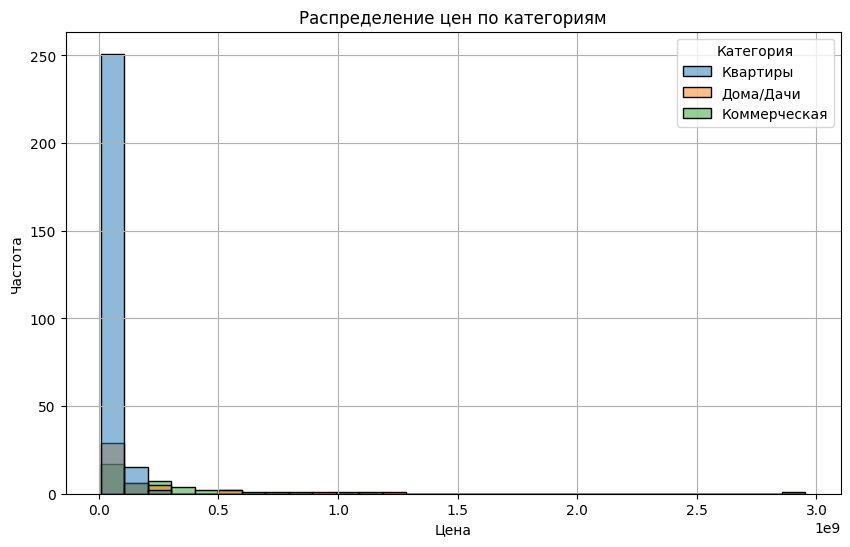

In [224]:
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='Цена', hue='Категория', bins=30, kde=False)

plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен по категориям')
plt.grid(True)

* Средняя цена по локациям:

In [225]:
apartments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Название           268 non-null    object 
 1   Цена               268 non-null    int64  
 2   Расположение       268 non-null    object 
 3   Район              268 non-null    object 
 4   Год постройки      268 non-null    int32  
 5   Количество комнат  268 non-null    int32  
 6   Площадь(кв.м)      268 non-null    float64
 7   Этаж               268 non-null    int32  
 8   Дата               268 non-null    object 
 9   Просмотрено        268 non-null    int32  
 10  Категория          268 non-null    object 
dtypes: float64(1), int32(4), int64(1), object(5)
memory usage: 19.0+ KB


In [227]:
# Your code goes here

apartments_clean.groupby('Район').Цена.mean().apply(lambda x: f"{x:.2f}")


Район
Алатауский       28909090.88
Алмалинский      52407499.95
Ауэзовский       42140908.30
Бостандыкский    70990264.00
Жетысуский       33166666.67
Медеуский        70141176.47
Наурызбайский    46546428.46
Турксибский      32808673.68
Name: Цена, dtype: object

In [228]:
houses_clean.groupby('Район').Цена.mean().apply(lambda x: f"{x:.2f}")


Район
Алатауский        76900000.00
Алмалинский       15000000.00
Ауэзовский        88500000.00
Бостандыкский    238133333.17
Жетысуский        39900000.00
Медеуский        309041583.33
Наурызбайский     98600000.00
Турксибский       54166666.67
Name: Цена, dtype: object

In [229]:
commerce_clean.groupby('Район').Цена.mean().apply(lambda x: f"{x:.2f}")


Район
Алатауский        42000000.00
Алмалинский      351000000.00
Ауэзовский       567916666.67
Бостандыкский    265619000.00
Жетысуский       160875000.00
Медеуский        429525000.00
Наурызбайский    274833333.33
Турксибский      257666666.67
Name: Цена, dtype: object

* Цена vs. Площадь:

In [303]:
# Your code goes here


combined_data1 = pd.concat([apartments_clean, houses_clean, commerce_clean], ignore_index=True)

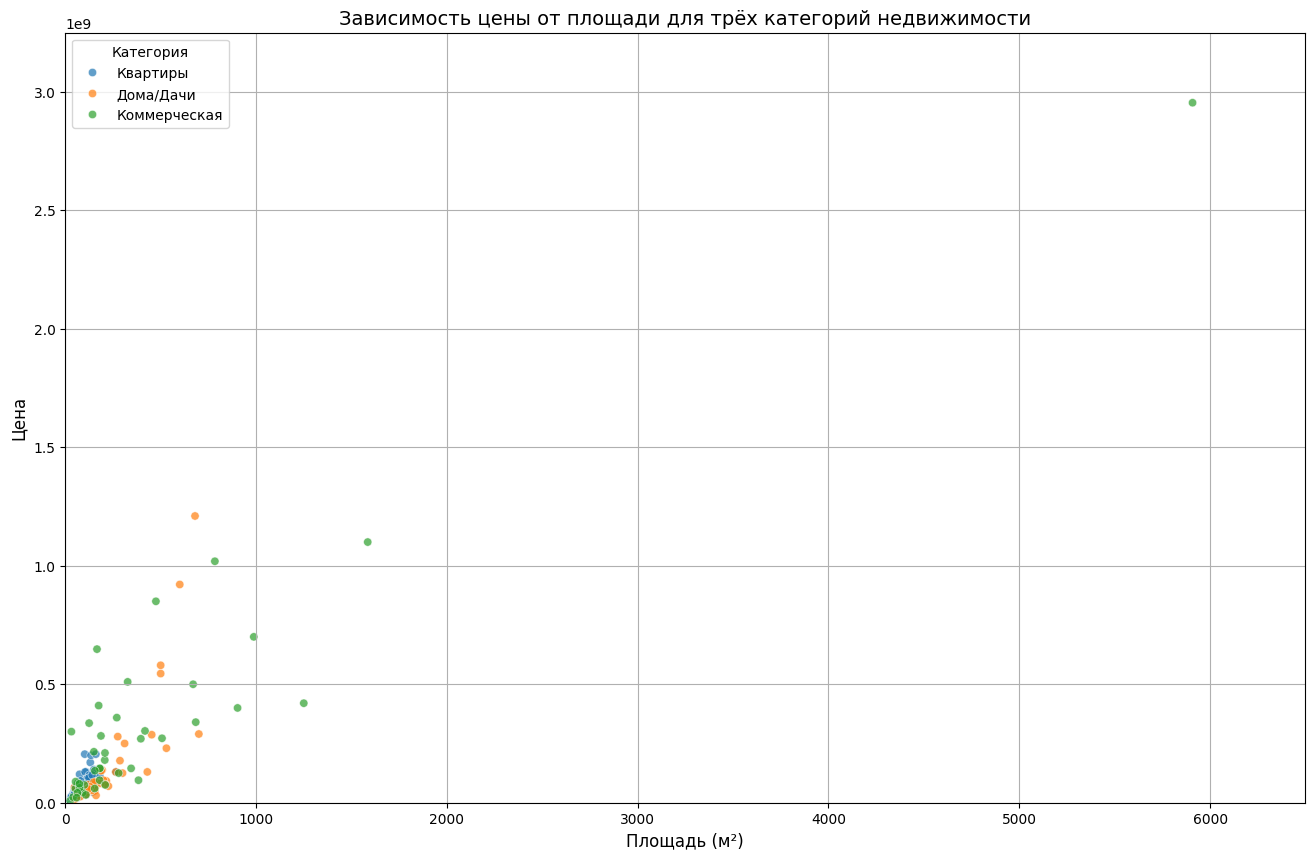

In [247]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=combined_data1, x='Площадь(кв.м.)', y='Цена', hue='Категория', alpha=0.7)

plt.xlim(0, combined_data1['Площадь(кв.м.)'].max() * 1.1) 
plt.ylim(0, combined_data1['Цена'].max() * 1.1)
plt.title('Зависимость цены от площади для трёх категорий недвижимости', fontsize=14)
plt.xlabel('Площадь (м²)', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.legend(title='Категория', fontsize=10)
plt.grid(True)

* Распределение цены за квадратный метр:

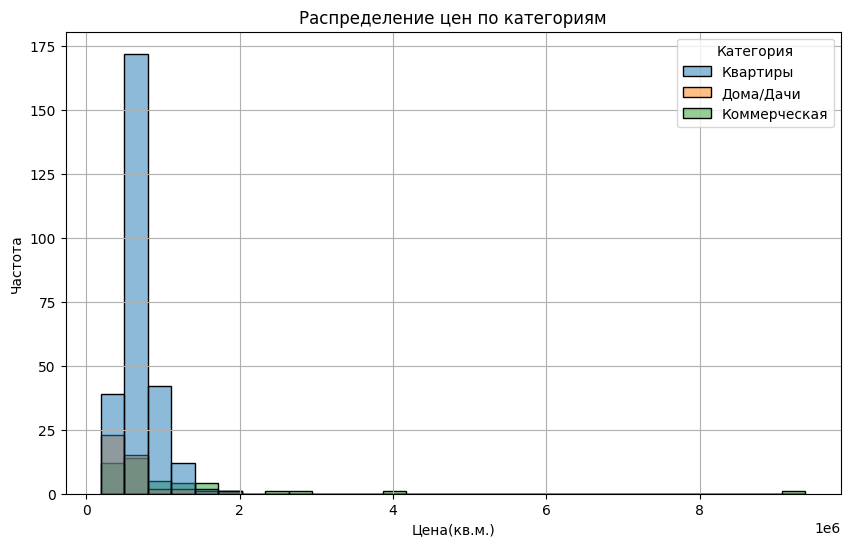

In [243]:
# Your code goes here


plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data1, x='Цена(кв.м.)', hue='Категория', bins=30, kde=False)

plt.xlabel('Цена(кв.м.)')
plt.ylabel('Частота')
plt.title('Распределение цен по категориям')
plt.grid(True)

* Анализ количества комнат (Цена в зависимости от количества комнат):

In [246]:
# Your code goes here


combined_data2 = pd.concat([apartments_clean, houses_clean], ignore_index=True)

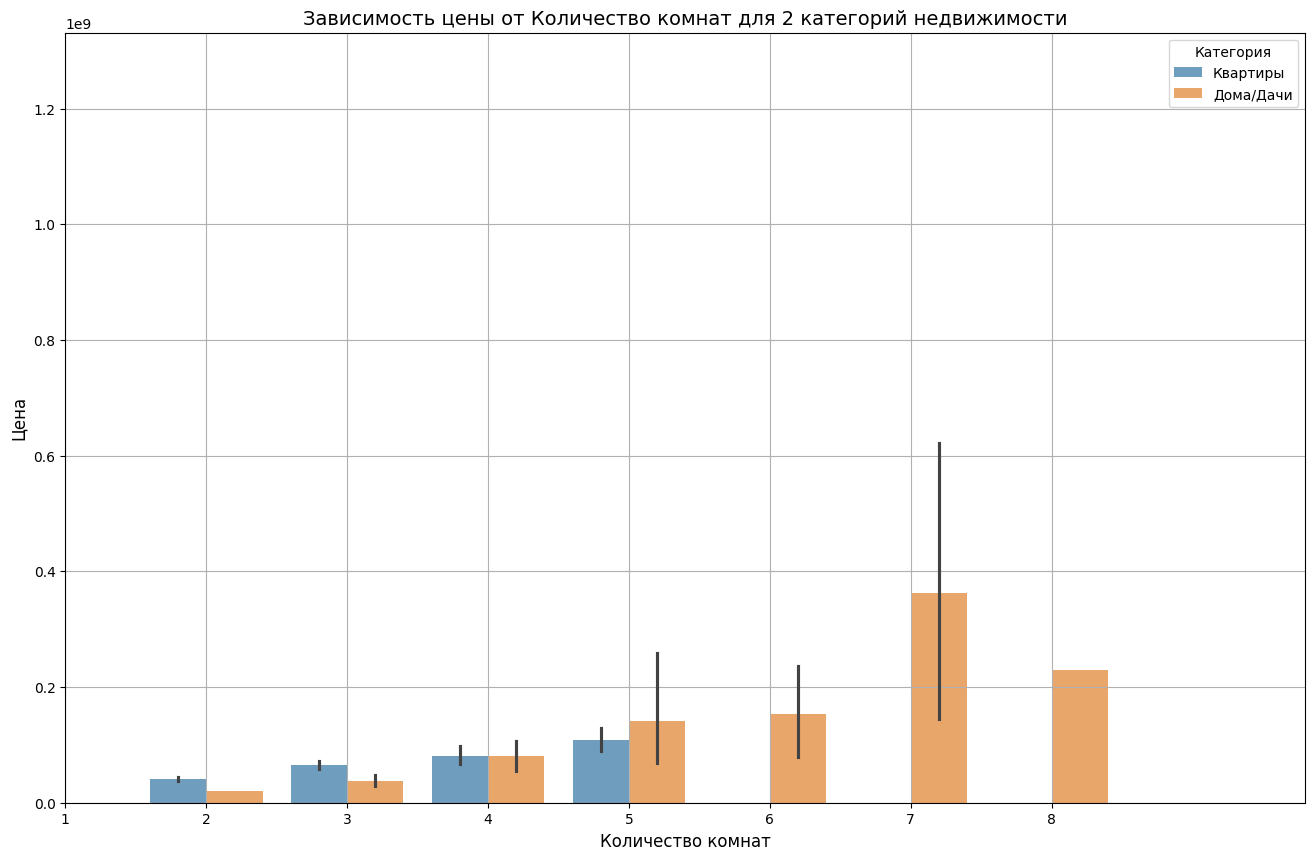

In [252]:
plt.figure(figsize=(16, 10))
sns.barplot(data=combined_data2, x='Количество комнат', y='Цена', hue='Категория', alpha=0.7)

plt.xlim(0, combined_data2['Количество комнат'].max() * 1.1)
plt.ylim(0, combined_data2['Цена'].max() * 1.1)
plt.title('Зависимость цены от Количество комнат для 2 категорий недвижимости', fontsize=14)
plt.xlabel('Количество комнат', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.legend(title='Категория', fontsize=10)
plt.grid(True)

* Группировка данных по диапазонам площади:

In [253]:
combined_data1['Площадь(кв.м.)'].max()

5908.0

In [254]:
combined_data1['Площадь(кв.м.)'].min()

23.0

In [263]:
# Разделите данные на группы по площади (например, 0-50 м², 50-100 м², и т.д.).


bins = list(range(0, 5950, 50)) + [6000]
labels = [f'{i}-{i+50} м²' for i in range(0, 5900, 50)]

labels.append('5900+ м²')

# Вычислите среднюю цену для каждой группы.
combined_data1['Площадь группа'] = pd.cut(combined_data1['Площадь(кв.м.)'], bins=bins, labels=labels, right=False)
grouped_data = combined_data1.groupby('Площадь группа')['Цена'].median().reset_index()


C:\Users\Alex\AppData\Local\Temp\ipykernel_17936\2254540659.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = combined_data1.groupby('Площадь группа')['Цена'].median().reset_index()


In [268]:
grouped_data['Цена'] = grouped_data['Цена'].apply(lambda x: f"{x:.1f}")

In [272]:
grouped_data_cleaned = grouped_data[grouped_data['Цена'] != 'nan']

* Медианная цена по площади:



In [273]:
# Вычислите медианные значения цены в каждом диапазоне площади.


grouped_data_cleaned

Площадь группа          Цена
0          0-50 м²    25750000.0
1        50-100 м²    42500000.0
2       100-150 м²    81000000.0
3       150-200 м²   120000000.0
4       200-250 м²    92000000.0
5       250-300 м²   153649500.0
6       300-350 м²   197500000.0
7       350-400 м²   182500000.0
8       400-450 м²   216500000.0
9       450-500 м²   568500000.0
10      500-550 м²   408500000.0
12      600-650 м²   921000000.0
13      650-700 м²   500000000.0
14      700-750 м²   290000000.0
15      750-800 м²  1019000000.0
18      900-950 м²   400000000.0
19     950-1000 м²   700000000.0
25    1250-1300 м²   420000000.0
31    1550-1600 м²  1100000000.0
118       5900+ м²  2954000000.0

* Проверка аномалий и удаление:

In [ ]:
# Найдите объявления, где цена значительно выше или ниже ожидаемой для определённой площади.
# outliers = df[(df['Цена'] > 1.5 * df['Цена'].mean()) & (df['Площадь'] < 50)]
# print(outliers[['Название', 'Цена', 'Площадь']])

apartments_clean, houses_clean, commerce_clean

In [276]:
apartments_clean[(apartments_clean['Цена'] > 1.5 * apartments_clean['Цена'].mean()) & (apartments_clean['Площадь(кв.м.)'] < 70)]

Название      Цена Расположение  \
18     3-комнатная квартира · 68 м² · 4/5 этаж  80000000       Алматы   
83  3-комнатная квартира · 68.4 м² · 8/13 этаж  82000000       Алматы   

            Район  Год постройки  Количество комнат  Площадь(кв.м.)  Этаж  \
18      Медеуский           1985                  3            68.0     4   
83  Бостандыкский           2021                  3            68.4     8   

        Дата  Просмотрено Категория   Цена(кв.м.)  
18  23 нояб.          192  Квартиры  1.176471e+06  
83  23 нояб.          147  Квартиры  1.198830e+06

In [275]:
apartments_clean['Площадь(кв.м.)'].mean()

72.50746268656717

In [277]:
houses_clean['Площадь(кв.м.)'].mean()

223.8136363636364

In [280]:
houses_clean[(houses_clean['Цена'] > 1.5 * houses_clean['Цена'].mean()) & (houses_clean['Площадь(кв.м.)'] < 300)]

Название       Цена Расположение  \
13  Отдельный дом · 7 комнат · 275 м² · 7 сот.  279000000       Алматы   

            Район  Год постройки  Количество комнат  Площадь(кв.м.)  Сотки  \
13  Наурызбайский           2022                  7           275.0    7.0   

        Дата  Просмотрено  Категория   Цена(кв.м.)  
13  24 нояб.         1414  Дома/Дачи  1.014545e+06

In [281]:
commerce_clean['Площадь(кв.м.)'].mean()

440.3186363636365

In [282]:
commerce_clean[(commerce_clean['Цена'] > 1.5 * commerce_clean['Цена'].mean()) & (commerce_clean['Площадь(кв.м.)'] < 440)]

Название       Цена  Цена(кв.м.)  \
0   Свободное назначение, офисы, салоны красоты · ...  648150000      3899819   
14                      Свободное назначение · 327 м²  510000000      1559633   

   Расположение        Район  Год постройки  Площадь(кв.м.)      Дата  \
0        Алматы    Медеуский           1995           166.2  25 нояб.   
14       Алматы  Алмалинский           1969           327.0  25 нояб.   

    Просмотрено     Категория  
0           101  Коммерческая  
14         1615  Коммерческая

* Корреляционный анализ:

In [ ]:
# correlation = df['Цена'].corr(df['Площадь'])
# print(f"Коэффициент корреляции между ценой и площадью: {correlation}")




In [283]:
apartments_clean['Цена'].corr(apartments_clean['Площадь(кв.м.)'])

0.7805580621883054

In [284]:
houses_clean['Цена'].corr(houses_clean['Площадь(кв.м.)'])

0.8089907971482707

In [285]:
commerce_clean['Цена'].corr(commerce_clean['Площадь(кв.м.)'])

0.9295561594025972

* График плотности(Bonus):

Text(0, 0.5, 'Цена')

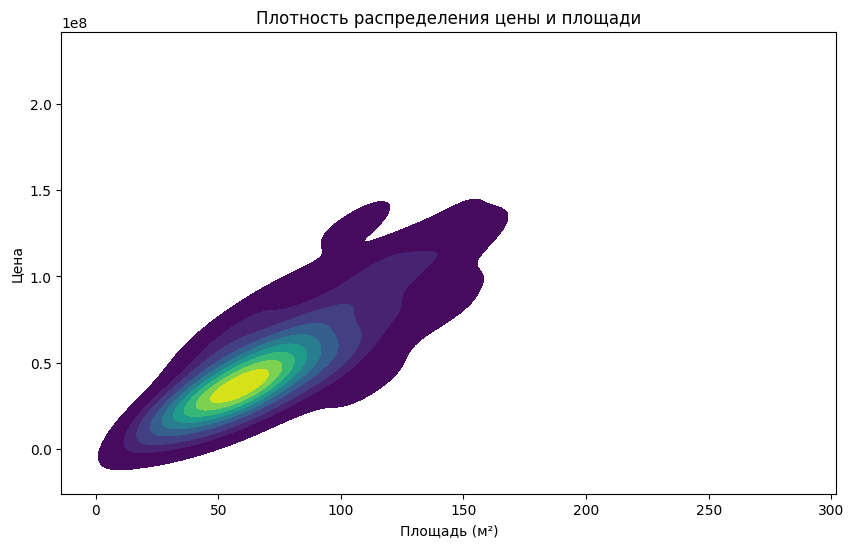

In [286]:
# Постройте график плотности для площади и цены.
# plt.figure(figsize=(10, 6))
# sns.kdeplot(data=df, x='Площадь', y='Цена', fill=True, cmap='viridis')
# plt.title("Плотность распределения цены и площади")
# plt.xlabel("Площадь (м²)")
# plt.ylabel("Цена")
# plt.show()


plt.figure(figsize=(10, 6))
sns.kdeplot(data=apartments_clean, x='Площадь(кв.м.)', y='Цена', fill=True, cmap='viridis')
plt.title("Плотность распределения цены и площади")
plt.xlabel("Площадь (м²)")
plt.ylabel("Цена")

Text(0, 0.5, 'Цена')

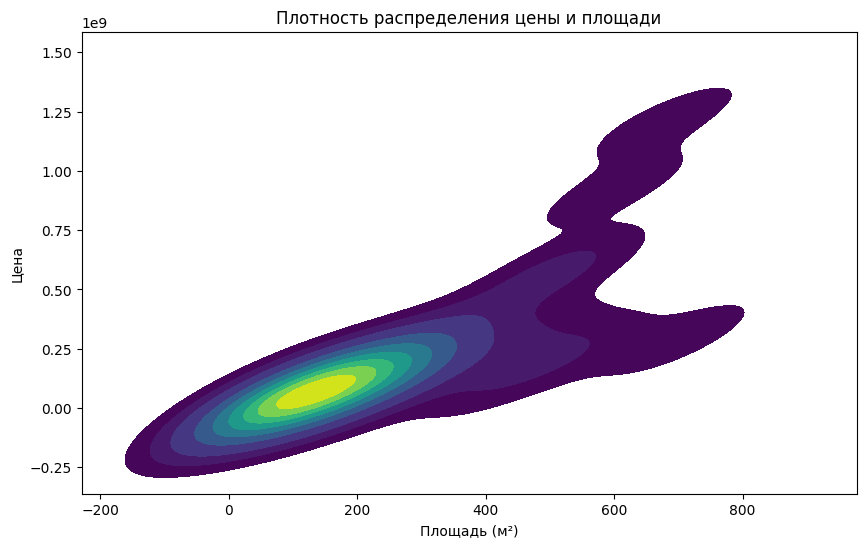

In [287]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=houses_clean, x='Площадь(кв.м.)', y='Цена', fill=True, cmap='viridis')
plt.title("Плотность распределения цены и площади")
plt.xlabel("Площадь (м²)")
plt.ylabel("Цена")

Text(0, 0.5, 'Цена')

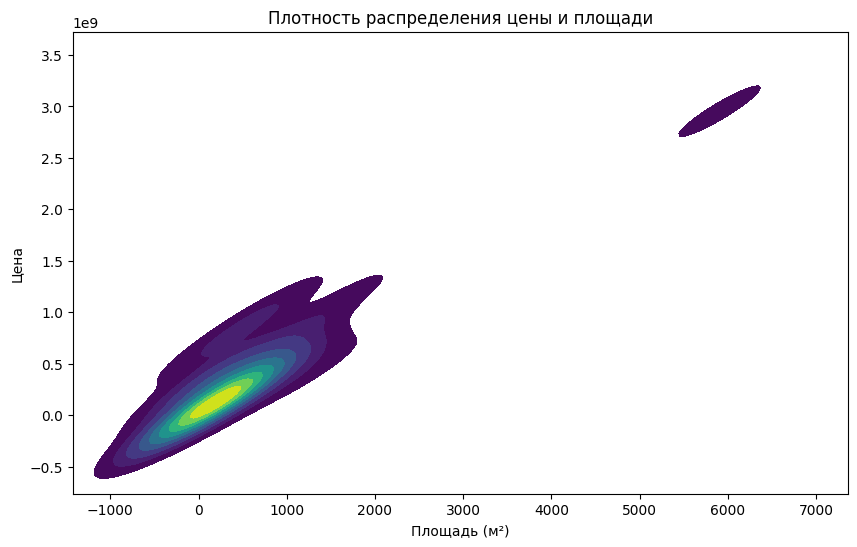

In [288]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=commerce_clean, x='Площадь(кв.м.)', y='Цена', fill=True, cmap='viridis')
plt.title("Плотность распределения цены и площади")
plt.xlabel("Площадь (м²)")
plt.ylabel("Цена")

* Детализация диапазонов площади(Bonus):

In [315]:
# Разделите площади на более мелкие категории (например, каждые 10 м²). Это поможет обнаружить более детализированные тренды.
# bins = list(range(0, 310, 10))  # Диапазоны каждые 10 м²
# labels = [f"{i}-{i+10} м²" for i in range(0, 300, 10)]
# df['Диапазон_площади'] = pd.cut(df['Площадь'], bins=bins, labels=labels, right=False)


bins1 = list(range(0, 5950, 10)) + [6000]  # 595 интервалов
labels1 = [f'{i}-{i+10} м²' for i in range(0, 5950, 10)]

# Вычислите среднюю цену для каждой группы.
combined_data1['Площадь группа детализировано'] = pd.cut(combined_data1['Площадь(кв.м.)'], bins=bins1, labels=labels1, right=False)
grouped_data1 = combined_data1.groupby('Площадь группа детализировано')['Цена'].mean().reset_index()

C:\Users\Alex\AppData\Local\Temp\ipykernel_17936\3021924137.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data1 = combined_data1.groupby('Площадь группа детализировано')['Цена'].mean().reset_index()


In [316]:
len(bins1), len(labels1)

(596, 595)

In [317]:
grouped_data1['Цена'] = grouped_data1['Цена'].apply(lambda x: f"{x:.1f}")

In [319]:
grouped_data1[grouped_data1['Цена'] != 'nan']

Площадь группа детализировано          Цена
2                        20-30 м²    13849999.8
3                        30-40 м²    36694736.8
4                        40-50 м²    31064102.5
5                        50-60 м²    36794766.6
6                        60-70 м²    42757877.2
7                        70-80 м²    51342856.4
8                        80-90 м²    55377777.7
9                       90-100 м²    56956249.9
10                     100-110 м²    80911764.7
11                     110-120 м²    75700000.0
12                     120-130 м²   103669230.8
13                     130-140 м²   110499999.9
14                     140-150 м²    90380000.0
15                     150-160 м²   106699999.9
16                     160-170 м²   211430000.0
17                     170-180 м²   410000000.0
18                     180-190 м²   142702857.1
19                     190-200 м²   138000000.0
20                     200-210 м²   127600000.0
21                     210-220 м²    92000000.0
22                     220-230 м²    70000000.0
26                     260-270 м²   129800000.0
27                     270-280 м²   319050000.0
28                     280-290 м²   151249500.0
30                     300-310 м²   125000000.0
31                     310-320 м²   250000000.0
32                     320-330 м²   510000000.0
34                     340-350 м²   145000000.0
38                     380-390 м²    95000000.0
39                     390-400 м²   270000000.0
41                     410-420 м²   303000000.0
43                     430-440 м²   130000000.0
45                     450-460 м²   287000000.0
47                     470-480 м²   850000000.0
50                     500-510 м²   465666666.7
53                     530-540 м²   230000000.0
60                     600-610 м²   921000000.0
67                     670-680 м²   500000000.0
68                     680-690 м²   775000000.0
70                     700-710 м²   290000000.0
78                     780-790 м²  1019000000.0
90                     900-910 м²   400000000.0
98                     980-990 м²   700000000.0
125                  1250-1260 м²   420000000.0
158                  1580-1590 м²  1100000000.0
590                  5900-5910 м²  2954000000.0

* Сегментация по типу недвижимости(Bonus):

Это задание я по сути делал выше

In [ ]:
# Разделите данные на категории (например, квартиры, дома) и проанализируйте зависимость цены от площади в каждом сегменте.
# df['Тип_недвижимости'] = df['Название'].str.extract('(квартира|дом|дача|таунхаус)', expand=False)
# sns.scatterplot(data=df, x='Площадь', y='Цена', hue='Тип_недвижимости')



* Объединение анализа площади с количеством комнат(Bonus):

In [289]:
from mpl_toolkits.mplot3d import Axes3D

Это возможно сделать только для квартир и домов

Text(0.5, 0, 'Цена')

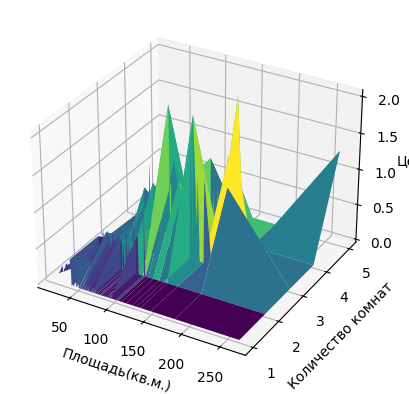

In [292]:
# Выясните, как связаны площадь, цена и количество комнат.


x = apartments_clean['Площадь(кв.м.)'].values
y = apartments_clean['Количество комнат'].values
z = apartments_clean['Цена'].values

X, Y = np.meshgrid(np.unique(x), np.unique(y))

Z = np.zeros_like(X)

for i, xi in enumerate(np.unique(x)):
    for j, yj in enumerate(np.unique(y)):
        mask = (apartments_clean['Площадь(кв.м.)'] == xi) & (apartments_clean['Количество комнат'] == yj)
        if mask.any():
            Z[j, i] = apartments_clean.loc[mask, 'Цена'].values[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Площадь(кв.м.)')
ax.set_ylabel('Количество комнат')
ax.set_zlabel('Цена')

Text(0.5, 0, 'Цена')

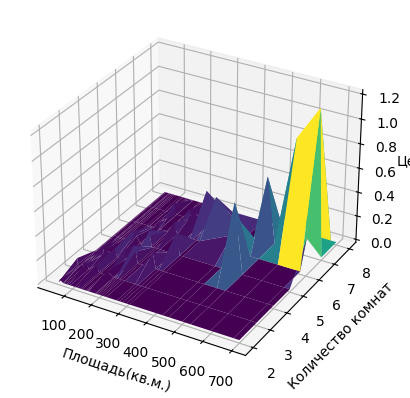

In [296]:
x = houses_clean['Площадь(кв.м.)'].values
y = houses_clean['Количество комнат'].values
z = houses_clean['Цена'].values

X, Y = np.meshgrid(np.unique(x), np.unique(y))

Z = np.zeros_like(X)

for i, xi in enumerate(np.unique(x)):
    for j, yj in enumerate(np.unique(y)):
        mask = (houses_clean['Площадь(кв.м.)'] == xi) & (houses_clean['Количество комнат'] == yj)
        if mask.any():
            Z[j, i] = houses_clean.loc[mask, 'Цена'].values[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Площадь(кв.м.)')
ax.set_ylabel('Количество комнат')
ax.set_zlabel('Цена')

* Площадь и этажность(Bonus):

Этаж есть только у квартир

Text(0.5, 0, 'Цена')

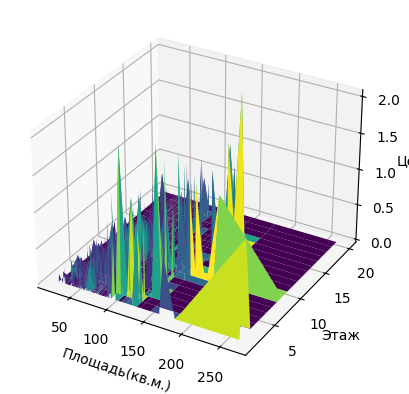

In [300]:
# Если в данных есть информация об этажах, проанализируйте, как этажность влияет на стоимость недвижимости разной площади.
x = apartments_clean['Площадь(кв.м.)'].values
y = apartments_clean['Этаж'].values
z = apartments_clean['Цена'].values

X, Y = np.meshgrid(np.unique(x), np.unique(y))

Z = np.zeros_like(X)

for i, xi in enumerate(np.unique(x)):
    for j, yj in enumerate(np.unique(y)):
        mask = (apartments_clean['Площадь(кв.м.)'] == xi) & (apartments_clean['Этаж'] == yj)
        if mask.any():
            Z[j, i] = apartments_clean.loc[mask, 'Цена'].values[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Площадь(кв.м.)')
ax.set_ylabel('Этаж')
ax.set_zlabel('Цена')



Text(0, 0.5, 'Цена')

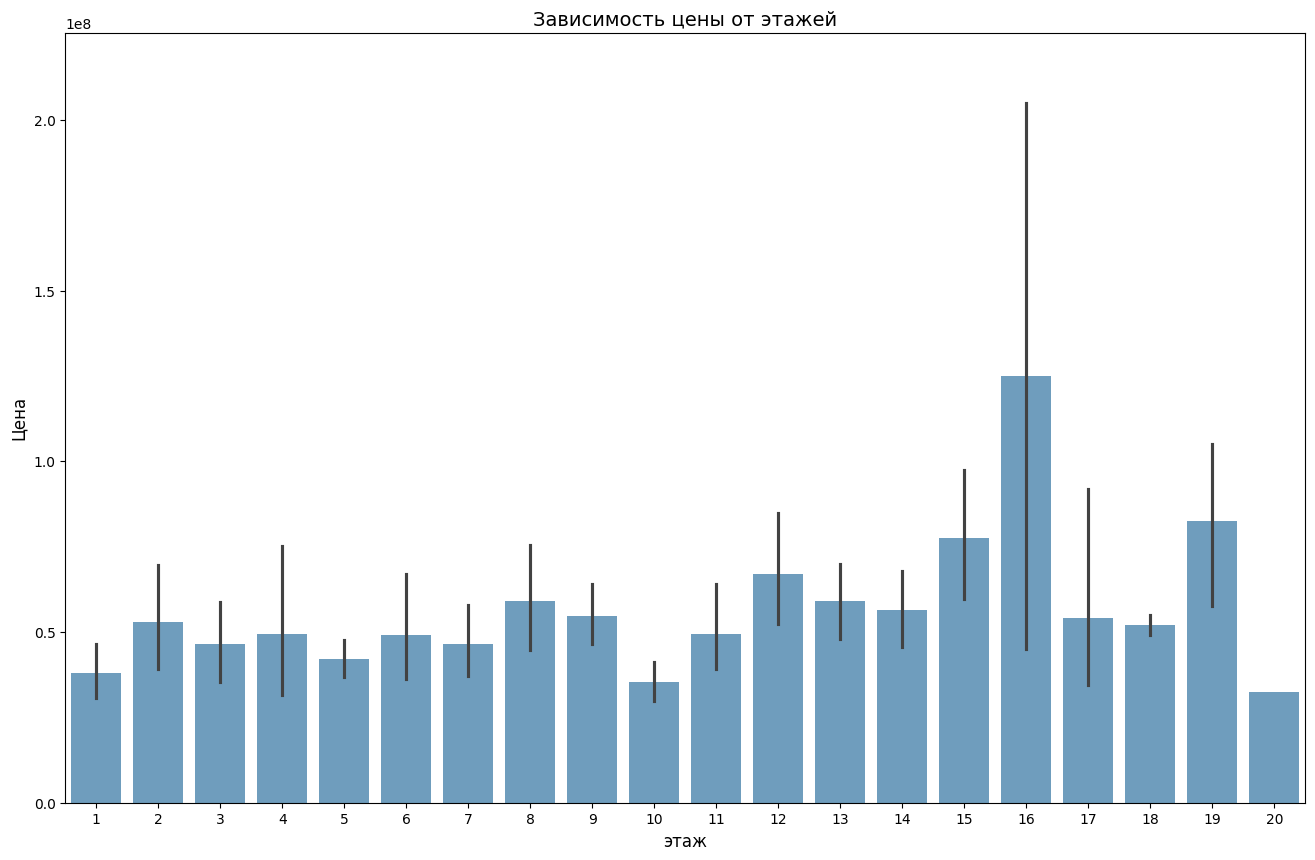

In [302]:
plt.figure(figsize=(16, 10))
sns.barplot(data=apartments_clean, x='Этаж', y='Цена', alpha=0.7)

#plt.xlim(0, apartments_clean['Площадь(кв.м.)'].max()) 
plt.ylim(0, apartments_clean['Цена'].max() * 1.1)
plt.title('Зависимость цены от этажей', fontsize=14)
plt.xlabel('этаж', fontsize=12)
plt.ylabel('Цена', fontsize=12)

### **Этап 5: Получение инсайтов**

1. Самые дорогие локации:

In [328]:
# Выведите топ-5 локаций с самой высокой средней ценой.


apartments_clean.groupby('Район')['Цена'].mean().sort_values(ascending=False).head().apply(lambda x: f"{x:.1f}")

Район
Бостандыкский    70990264.0
Медеуский        70141176.5
Алмалинский      52407500.0
Наурызбайский    46546428.5
Ауэзовский       42140908.3
Name: Цена, dtype: object

In [329]:
houses_clean.groupby('Район')['Цена'].mean().sort_values(ascending=False).head().apply(lambda x: f"{x:.1f}")

Район
Медеуский        309041583.3
Бостандыкский    238133333.2
Наурызбайский     98600000.0
Ауэзовский        88500000.0
Алатауский        76900000.0
Name: Цена, dtype: object

In [330]:
commerce_clean.groupby('Район')['Цена'].mean().sort_values(ascending=False).head().apply(lambda x: f"{x:.1f}")

Район
Ауэзовский       567916666.7
Медеуский        429525000.0
Алмалинский      351000000.0
Наурызбайский    274833333.3
Бостандыкский    265619000.0
Name: Цена, dtype: object

2. Локации с лучшей стоимостью:

In [332]:
apartments_clean['Цена_на_кв_м'] = apartments_clean['Цена'] / apartments_clean['Площадь(кв.м.)']

In [336]:
houses_clean['Цена_на_кв_м'] = houses_clean['Цена'] / houses_clean['Площадь(кв.м.)']

In [334]:
# Определите локации с минимальной ценой за квадратный метр.


apartments_clean.groupby('Район')['Цена_на_кв_м'].min().sort_values().apply(lambda x: f"{x:.1f}")

Район
Жетысуский       308411.2
Наурызбайский    321428.6
Турксибский      335937.5
Алатауский       354558.6
Ауэзовский       360000.0
Медеуский        396551.7
Бостандыкский    485148.5
Алмалинский      519791.7
Name: Цена_на_кв_м, dtype: object

In [338]:
houses_clean.groupby('Район')['Цена(кв.м.)'].min().sort_values().apply(lambda x: f"{x:.1f}")

Район
Наурызбайский    192427.1
Алмалинский      300000.0
Алатауский       309734.5
Жетысуский       318181.8
Медеуский        322580.6
Турксибский      386792.5
Бостандыкский    475000.0
Ауэзовский       591549.3
Name: Цена(кв.м.), dtype: object

In [339]:
commerce_clean.groupby('Район')['Цена(кв.м.)'].min().sort_values().apply(lambda x: f"{x:.1f}")

Район
Ауэзовский       247654.0
Турксибский      305556.0
Жетысуский       326923.0
Бостандыкский    336000.0
Наурызбайский    472222.0
Алмалинский      536489.0
Алатауский       657277.0
Медеуский        681818.0
Name: Цена(кв.м.), dtype: object

3. Тренды цен по дням:

In [340]:
# Если данные содержат дату публикации, проанализируйте тренды цен.


apartments_clean.groupby('Дата')['Цена'].mean().sort_values().apply(lambda x: f"{x:.1f}")

Дата
23 нояб.    49909509.2
24 нояб.    53473610.6
Name: Цена, dtype: object

In [341]:
houses_clean.groupby('Дата')['Цена'].mean().sort_values().apply(lambda x: f"{x:.1f}")

Дата
23 нояб.    114113590.9
24 нояб.    206877272.7
Name: Цена, dtype: object

In [342]:
commerce_clean.groupby('Дата')['Цена'].mean().sort_values().apply(lambda x: f"{x:.1f}")

Дата
24 нояб.    112500000.0
25 нояб.    334465571.4
Name: Цена, dtype: object

4. Популярные размеры недвижимости:

In [347]:
grouped_data1.head()

Площадь группа детализировано        Цена
0                       0-10 м²         nan
1                      10-20 м²         nan
2                      20-30 м²  13849999.8
3                      30-40 м²  36694736.8
4                      40-50 м²  31064102.5

In [350]:
combined_data1.head()

Название       Цена Расположение  \
0     2-комнатная квартира · 51 м² · 17/17 этаж   35500000       Алматы   
1     4-комнатная квартира · 149 м² · 8/16 этаж  119900000       Алматы   
2      2-комнатная квартира · 55 м² · 8/12 этаж   42000000       Алматы   
3     4-комнатная квартира · 90.1 м² · 3/5 этаж   65400000       Алматы   
4  1-комнатная квартира · 48.85 м² · 15/17 этаж   40000000       Алматы   

           Район  Год постройки  Количество комнат  Площадь(кв.м.)  Этаж  \
0     Ауэзовский           2016                2.0           51.00  17.0   
1  Бостандыкский           2008                4.0          149.00   8.0   
2  Бостандыкский           2021                2.0           55.00   8.0   
3      Медеуский           1978                4.0           90.10   3.0   
4    Алмалинский           2022                1.0           48.85  15.0   

       Дата  Просмотрено Категория    Цена(кв.м.)  Сотки  \
0  24 нояб.          269  Квартиры  696078.431373    NaN   
1  24 нояб.          178  Квартиры  804697.986577    NaN   
2  24 нояб.          180  Квартиры  763636.363636    NaN   
3  24 нояб.           12  Квартиры  725860.155383    NaN   
4  24 нояб.          250  Квартиры  818833.162743    NaN   

  Площадь группа детализировано  
0                      50-60 м²  
1                    140-150 м²  
2                      50-60 м²  
3                     90-100 м²  
4                      40-50 м²

In [352]:
# Определите, какие размеры недвижимости наиболее популярны.


combined_data1.groupby('Площадь группа детализировано')['Площадь(кв.м.)'].count().sort_values(ascending=False)

C:\Users\Alex\AppData\Local\Temp\ipykernel_17936\164171828.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined_data1.groupby('Площадь группа детализировано')['Площадь(кв.м.)'].count().sort_values(ascending=False)


Площадь группа детализировано
60-70 м²        57
50-60 м²        48
40-50 м²        39
70-80 м²        35
80-90 м²        27
                ..
2220-2230 м²     0
2210-2220 м²     0
2200-2210 м²     0
2190-2200 м²     0
5940-5950 м²     0
Name: Площадь(кв.м.), Length: 595, dtype: int64

5. Сравнение предложение и цен:

In [354]:
# Определите, коррелируют ли высокий предложение и высокие цены

grouped_corr_apartments = apartments_clean.groupby('Площадь(кв.м.)').agg(
    средняя_цена=('Цена', 'mean'),
    количество_предложений=('Цена', 'count')
).reset_index()

# Вычисление корреляции
correlation_apartments = grouped_corr_apartments['средняя_цена'].corr(grouped_corr_apartments['количество_предложений'])

In [355]:
correlation_apartments

-0.09028690481085332

In [356]:
grouped_corr_houses = houses_clean.groupby('Площадь(кв.м.)').agg(
    средняя_цена=('Цена', 'mean'),
    количество_предложений=('Цена', 'count')
).reset_index()

# Вычисление корреляции
correlation_houses = grouped_corr_houses['средняя_цена'].corr(grouped_corr_houses['количество_предложений'])

In [357]:
correlation_houses

0.003080653985287121

In [358]:
grouped_corr_comm = commerce_clean.groupby('Площадь(кв.м.)').agg(
    средняя_цена=('Цена', 'mean'),
    количество_предложений=('Цена', 'count')
).reset_index()

# Вычисление корреляции
correlation_comm = grouped_corr_comm['средняя_цена'].corr(grouped_corr_comm['количество_предложений'])

In [360]:
correlation_comm

-0.05870016480303362

6. Группировка по локациям:

In [363]:
# Рассчитайте среднюю цену за квадратный метр для каждой локации.


apartments_clean.groupby('Район')['Цена(кв.м.)'].mean().sort_values()

Район
Жетысуский       516867.550296
Турксибский      521121.037495
Алатауский       538315.215498
Наурызбайский    571294.795416
Ауэзовский       632083.938243
Алмалинский      750918.334071
Бостандыкский    835338.711194
Медеуский        873885.424708
Name: Цена(кв.м.), dtype: float64

In [364]:
houses_clean.groupby('Район')['Цена(кв.м.)'].mean().sort_values()

Район
Алмалинский      300000.000000
Алатауский       395534.902533
Жетысуский       441962.919186
Турксибский      485515.984441
Наурызбайский    608233.565281
Ауэзовский       654817.201079
Бостандыкский    690370.653146
Медеуский        707180.515717
Name: Цена(кв.м.), dtype: float64

In [365]:
commerce_clean.groupby('Район')['Цена(кв.м.)'].mean().sort_values()

Район
Турксибский      4.152483e+05
Ауэзовский       5.499305e+05
Алатауский       6.572770e+05
Наурызбайский    8.113877e+05
Бостандыкский    8.402174e+05
Алмалинский      1.205050e+06
Медеуский        1.941810e+06
Жетысуский       2.789492e+06
Name: Цена(кв.м.), dtype: float64

7. Распределение цен по квадратному метру (гистограмма):

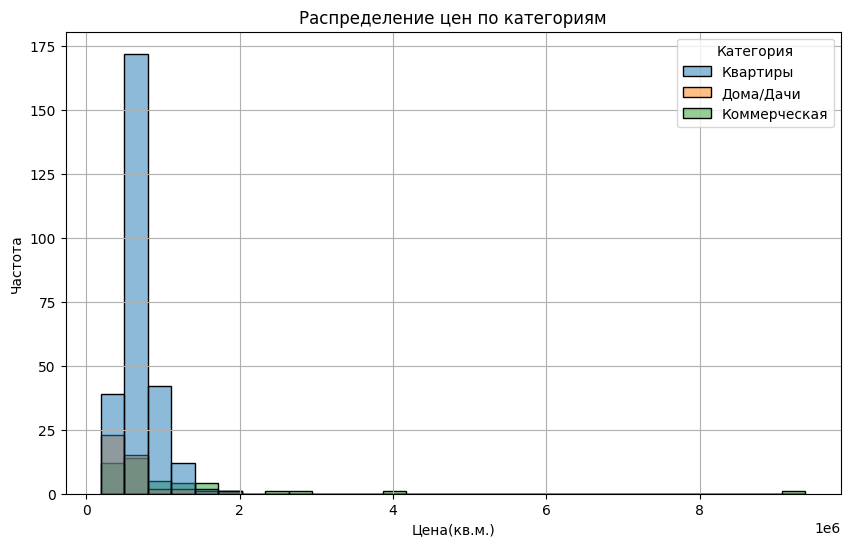

In [366]:
# Постройте гистограмму для отображения распределения цен за квадратный метр.


plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data1, x='Цена(кв.м.)', hue='Категория', bins=30, kde=False)

plt.xlabel('Цена(кв.м.)')
plt.ylabel('Частота')
plt.title('Распределение цен по категориям')
plt.grid(True)

8. Локации с самой высокой и низкой стоимостью за м²:

In [367]:
# Найдите локации с максимальной и минимальной стоимостью за квадратный метр.


apartments_clean[apartments_clean['Цена(кв.м.)'] == apartments_clean['Цена(кв.м.)'].min()]['Район']

70    Жетысуский
Name: Район, dtype: object

In [368]:
apartments_clean[apartments_clean['Цена(кв.м.)'] == apartments_clean['Цена(кв.м.)'].max()]['Район']

126    Медеуский
Name: Район, dtype: object

In [369]:
houses_clean[houses_clean['Цена(кв.м.)'] == houses_clean['Цена(кв.м.)'].min()]['Район']

6    Наурызбайский
Name: Район, dtype: object

In [370]:
houses_clean[houses_clean['Цена(кв.м.)'] == houses_clean['Цена(кв.м.)'].max()]['Район']

11    Медеуский
Name: Район, dtype: object

In [371]:
commerce_clean[commerce_clean['Цена(кв.м.)'] == commerce_clean['Цена(кв.м.)'].min()]['Район']

35    Ауэзовский
Name: Район, dtype: object

In [372]:
commerce_clean[commerce_clean['Цена(кв.м.)'] == commerce_clean['Цена(кв.м.)'].max()]['Район']

23    Жетысуский
Name: Район, dtype: object

9. Анализ аномалий:

In [403]:
# Найдите объявления, где цена за квадратный метр выше или ниже среднего значения для конкретной локации.


mean_price_per_location = apartments_clean.groupby('Район')['Цена(кв.м.)'].transform('mean')
apartments_clean['Средняя цена(кв.м.) по району'] = mean_price_per_location
apartments_clean['Выше/Ниже среднего'] = apartments_clean['Цена(кв.м.)'] > apartments_clean['Средняя цена(кв.м.) по району']

above_average = apartments_clean[apartments_clean['Выше/Ниже среднего'] == True]
below_average = apartments_clean[apartments_clean['Выше/Ниже среднего'] == False]

print("Объявления с ценой выше среднего:")
print(above_average.head())

print("\nОбъявления с ценой ниже среднего:")
print(below_average.head())


Объявления с ценой выше среднего:
                                        Название       Цена Расположение  \
0      2-комнатная квартира · 51 м² · 17/17 этаж   35500000       Алматы   
4   1-комнатная квартира · 48.85 м² · 15/17 этаж   40000000       Алматы   
9     3-комнатная квартира · 109.3 м² · 3/3 этаж  130000000       Алматы   
13    1-комнатная квартира · 41.5 м² · 5/12 этаж   28000000       Алматы   
15     2-комнатная квартира · 89 м² · 15/15 этаж   90000000       Алматы   

            Район  Год постройки  Количество комнат  Площадь(кв.м.)  Этаж  \
0      Ауэзовский           2016                  2           51.00    17   
4     Алмалинский           2022                  1           48.85    15   
9   Бостандыкский           2008                  3          109.30     3   
13     Ауэзовский           2024                  1           41.50     5   
15    Алмалинский           2019                  2           89.00    15   

        Дата  Просмотрено Категория   Цена(кв.

In [405]:
mean_price_per_location_houses = houses_clean.groupby('Район')['Цена(кв.м.)'].transform('mean')
houses_clean['Средняя цена(кв.м.) по району'] = mean_price_per_location_houses
houses_clean['Выше/Ниже среднего'] = houses_clean['Цена(кв.м.)'] > houses_clean['Средняя цена(кв.м.) по району']

above_average_houses = houses_clean[houses_clean['Выше/Ниже среднего'] == True]
below_average_houses = houses_clean[houses_clean['Выше/Ниже среднего'] == False]

print("Объявления с ценой выше среднего:")
print(above_average_houses.head())

print("\nОбъявления с ценой ниже среднего:")
print(below_average_houses.head())

Объявления с ценой выше среднего:
                                         Название       Цена Расположение  \
4    Отдельный дом · 3 комнаты · 85 м² · 2.4 сот.   44000000       Алматы   
7      Отдельный дом · 7 комнат · 311 м² · 7 сот.  250000000       Алматы   
8    Отдельный дом · 5 комнат · 120 м² · 7.2 сот.   76000000       Алматы   
9     Отдельный дом · 5 комнат · 500 м² · 10 сот.  580000000       Алматы   
10  Отдельный дом · 3 комнаты · 48.5 м² · 10 сот.   65000000       Алматы   

            Район  Год постройки  Количество комнат  Площадь(кв.м.)  Сотки  \
4      Жетысуский           2010                  3            85.0    2.4   
7   Бостандыкский           2015                  7           311.0    7.0   
8   Наурызбайский           2019                  5           120.0    7.2   
9   Бостандыкский           2023                  5           500.0   10.0   
10  Наурызбайский           2000                  3            48.5   10.0   

        Дата  Просмотрено  Категор

In [406]:
mean_price_per_location_commerce = commerce_clean.groupby('Район')['Цена(кв.м.)'].transform('mean')
commerce_clean['Средняя цена(кв.м.) по району'] = mean_price_per_location_commerce
commerce_clean['Выше/Ниже среднего'] = commerce_clean['Цена(кв.м.)'] > commerce_clean['Средняя цена(кв.м.) по району']

above_average_commerce = commerce_clean[commerce_clean['Выше/Ниже среднего'] == True]
below_average_commerce = commerce_clean[commerce_clean['Выше/Ниже среднего'] == False]

print("Объявления с ценой выше среднего:")
print(above_average_commerce.head())

print("\nОбъявления с ценой ниже среднего:")
print(below_average_commerce.head())

Объявления с ценой выше среднего:
                                             Название       Цена  Цена(кв.м.)  \
0   Свободное назначение, офисы, салоны красоты · ...  648150000      3899819   
4   Офисы, магазины и бутики, салоны красоты, медц...   55000000       687500   
5                       Свободное назначение · 903 м²  400000000       442968   
8   Офисы, магазины и бутики, салоны красоты, бани...  180000000       869565   
10                                    Офисы · 52.9 м²   59500000      1124764   

   Расположение          Район  Год постройки  Площадь(кв.м.)      Дата  \
0        Алматы      Медеуский           1995           166.2  25 нояб.   
4        Алматы     Ауэзовский           1972            80.0  25 нояб.   
5        Алматы    Турксибский           2004           903.0  25 нояб.   
8        Алматы  Бостандыкский           2004           207.0  25 нояб.   
10       Алматы  Бостандыкский           2015            52.9  25 нояб.   

    Просмотрено     Категори

10. Диапазоны цены за квадратный метр:

In [413]:
# Разделите данные на диапазоны (например, дешёвое жильё, средний сегмент, элитное жильё).


bins = [0, 500000, 1000000, 2000000, float('inf')]
labels = ['Дешёвое жильё', 'Средний сегмент', 'Элитное жильё', 'Суперэлитное жильё']

apartments_clean['Категория жилья'] = pd.cut(apartments_clean['Цена(кв.м.)'], bins=bins, labels=labels, right=False)

In [414]:
apartments_clean['Категория жилья'].value_counts()

Категория жилья
Средний сегмент       208
Дешёвое жильё          40
Элитное жильё          19
Суперэлитное жильё      1
Name: count, dtype: int64

In [416]:
bins1 = [0, 300000, 700000, 1500000, float('inf')]
labels = ['Дешёвое жильё', 'Средний сегмент', 'Элитное жильё', 'Суперэлитное жильё']

houses_clean['Категория жилья'] = pd.cut(houses_clean['Цена(кв.м.)'], bins=bins1, labels=labels, right=False)

In [417]:
houses_clean['Категория жилья'].value_counts()

Категория жилья
Средний сегмент       34
Элитное жильё          7
Суперэлитное жильё     2
Дешёвое жильё          1
Name: count, dtype: int64

In [419]:
bins2 = [0, 900000, 2000000, 5000000, float('inf')]
labels = ['Дешёвое жильё', 'Средний сегмент', 'Элитное жильё', 'Суперэлитное жильё']

commerce_clean['Категория жилья'] = pd.cut(commerce_clean['Цена(кв.м.)'], bins=bins2, labels=labels, right=False)

In [418]:
commerce_clean['Цена(кв.м.)'].min(), commerce_clean['Цена(кв.м.)'].mean(), commerce_clean['Цена(кв.м.)'].max()

(247654, 1134416.4545454546, 9375000)

In [420]:
commerce_clean['Категория жилья'].value_counts()

Категория жилья
Дешёвое жильё         29
Средний сегмент       11
Элитное жильё          3
Суперэлитное жильё     1
Name: count, dtype: int64

11. Распределение по категориям жилья:

In [373]:
# Сравните среднюю цену за квадратный метр для разных типов недвижимости (квартиры, дома и т.д.).


apartments_clean['Цена(кв.м.)'].mean()

687551.6247071143

In [374]:
houses_clean['Цена(кв.м.)'].mean()

590099.9369172482

In [375]:
commerce_clean['Цена(кв.м.)'].mean()

1134416.4545454546

12. Детализация по годам постройки:

In [ ]:
# Выясните, как цена за квадратный метр зависит от года постройки недвижимости.




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, '1962'),
  Text(1, 0, '1967'),
  Text(2, 0, '1970'),
  Text(3, 0, '1971'),
  Text(4, 0, '1972'),
  Text(5, 0, '1973'),
  Text(6, 0, '1974'),
  Text(7, 0, '1975'),
  Text(8, 0, '1976'),
  Text(9, 0, '1977'),
  Text(10, 0, '1978'),
  Text(11, 0, '1979'),
  Text(12, 0, '1980'),
  Text(13, 0, '1981'),
  Text(14, 0, '1982'),
  Text(15, 0, '1983'),
  Text(16, 0, '1985'),
  Text(17, 0, '1986'),
  Text(18, 0, '1987'),
  Text(19, 0, '1988'),
  Text(20, 0, '1989'),
  Text(21, 0, '1990'),
  Text(22, 0, '1991'),
  Text(23, 0, '1992'),
  Text(24, 0, '1993'),
  Text(25, 0, '1994'),
  Text(26, 0, '1995'),
  Text(27, 0, '2004'),
  Text(28, 0, '2005'),
  Text(29, 0, '2006'),
  Text(30, 0, '2007'),
  Text(31, 0, '200

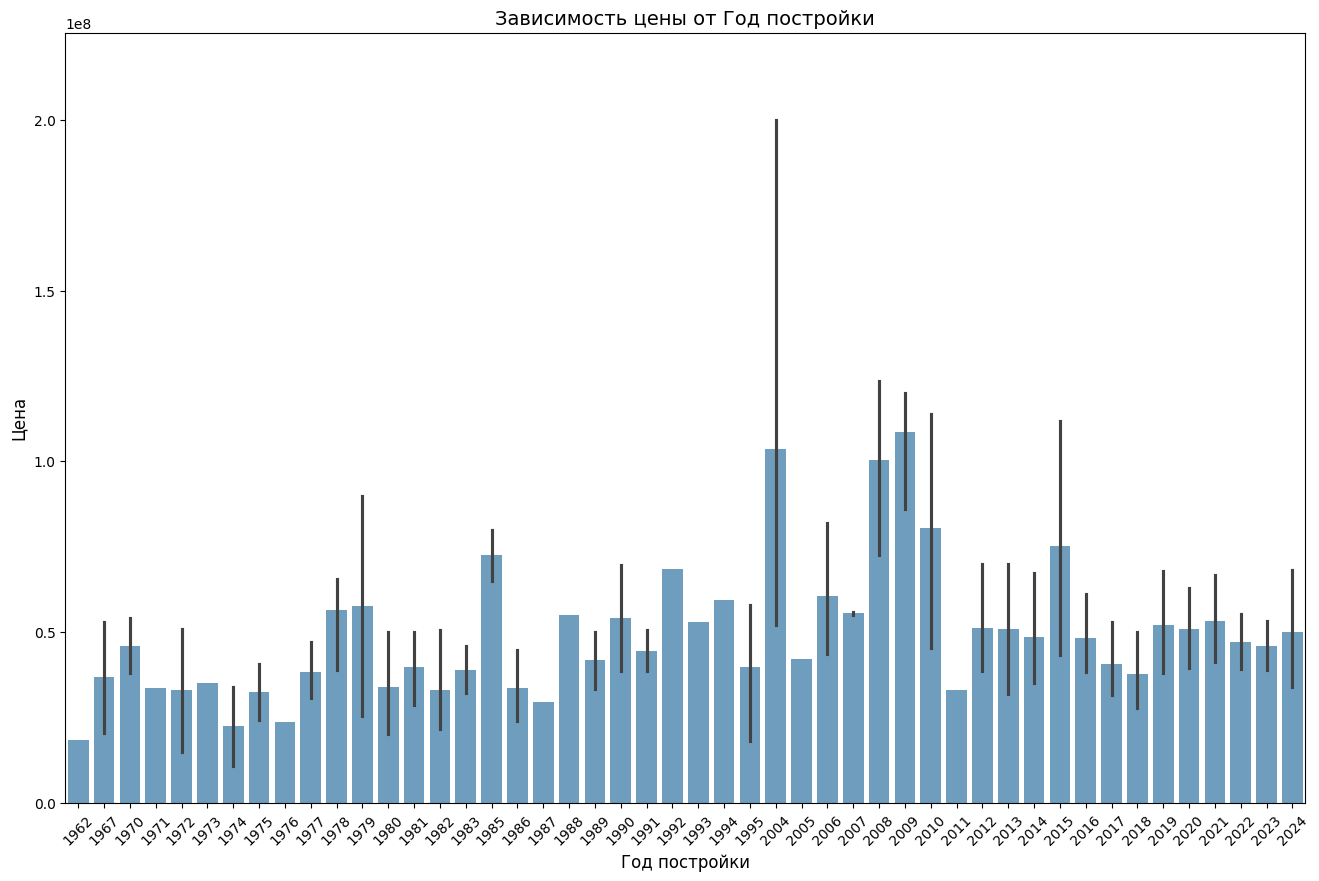

In [378]:
plt.figure(figsize=(16, 10))
sns.barplot(data=apartments_clean, x='Год постройки', y='Цена', alpha=0.7)

#plt.xlim(0, apartments_clean['Площадь(кв.м.)'].max()) 
plt.ylim(0, apartments_clean['Цена'].max() * 1.1)
plt.title('Зависимость цены от Год постройки', fontsize=14)
plt.xlabel('Год постройки', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, '1950'),
  Text(1, 0, '1957'),
  Text(2, 0, '1960'),
  Text(3, 0, '1969'),
  Text(4, 0, '1970'),
  Text(5, 0, '1998'),
  Text(6, 0, '1999'),
  Text(7, 0, '2000'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2010'),
  Text(15, 0, '2011'),
  Text(16, 0, '2012'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015'),
  Text(19, 0, '2017'),
  Text(20, 0, '2018'),
  Text(21, 0, '2019'),
  Text(22, 0, '2020'),
  Text(23, 0, '2021'),
  Text(24, 0, '2022'),
  Text(25, 0, '2023'),
  Text(26, 0, '2024')])

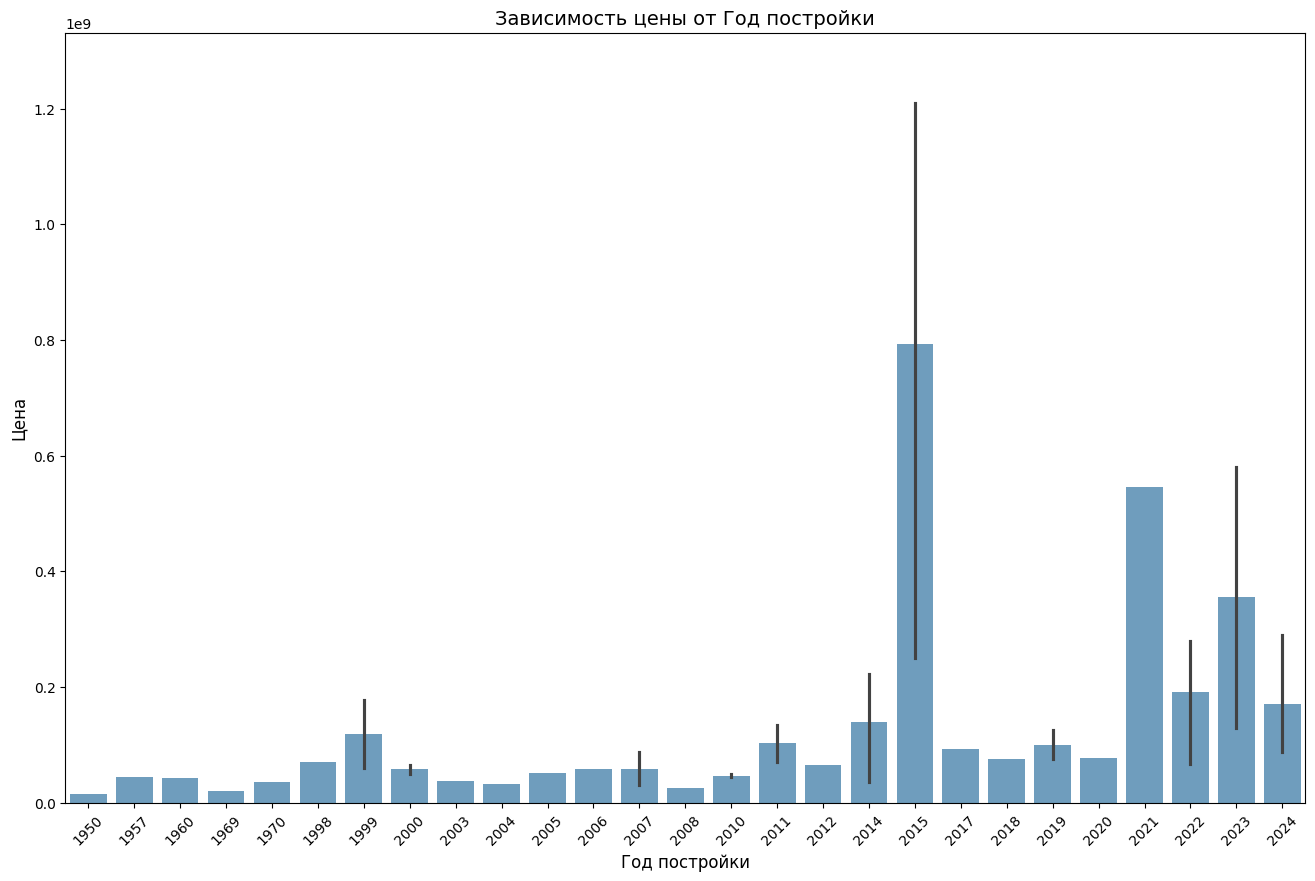

In [379]:
plt.figure(figsize=(16, 10))
sns.barplot(data=houses_clean, x='Год постройки', y='Цена', alpha=0.7)

#plt.xlim(0, apartments_clean['Площадь(кв.м.)'].max()) 
plt.ylim(0, houses_clean['Цена'].max() * 1.1)
plt.title('Зависимость цены от Год постройки', fontsize=14)
plt.xlabel('Год постройки', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, '1960'),
  Text(1, 0, '1967'),
  Text(2, 0, '1969'),
  Text(3, 0, '1972'),
  Text(4, 0, '1974'),
  Text(5, 0, '1975'),
  Text(6, 0, '1977'),
  Text(7, 0, '1980'),
  Text(8, 0, '1983'),
  Text(9, 0, '1988'),
  Text(10, 0, '1992'),
  Text(11, 0, '1995'),
  Text(12, 0, '2000'),
  Text(13, 0, '2004'),
  Text(14, 0, '2005'),
  Text(15, 0, '2006'),
  Text(16, 0, '2007'),
  Text(17, 0, '2008'),
  Text(18, 0, '2009'),
  Text(19, 0, '2010'),
  Text(20, 0, '2012'),
  Text(21, 0, '2014'),
  Text(22, 0, '2015'),
  Text(23, 0, '2018'),
  Text(24, 0, '2020'),
  Text(25, 0, '2021'),
  Text(26, 0, '2022'),
  Text(27, 0, '2023'),
  Text(28, 0, '2024')])

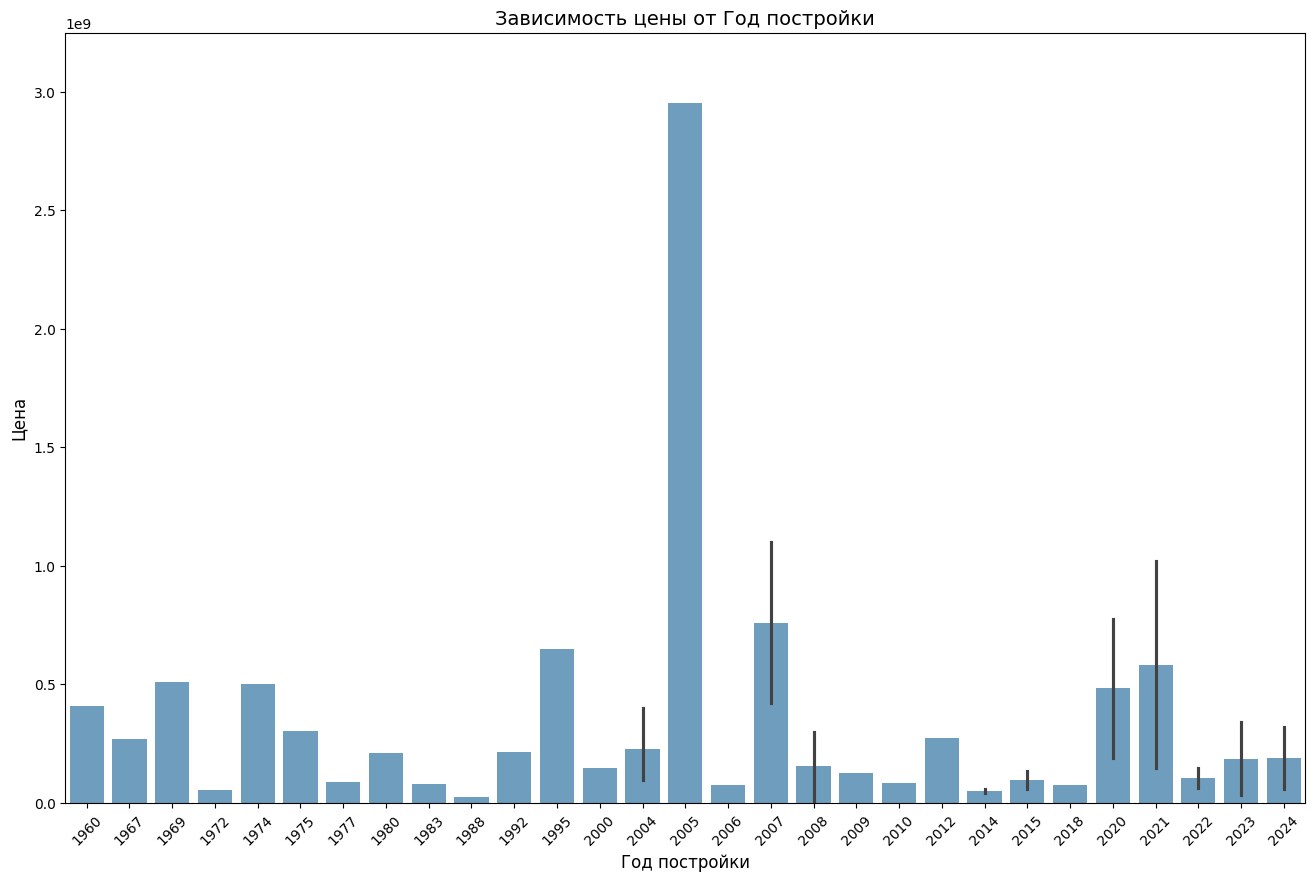

In [380]:
plt.figure(figsize=(16, 10))
sns.barplot(data=commerce_clean, x='Год постройки', y='Цена', alpha=0.7)

#plt.xlim(0, apartments_clean['Площадь(кв.м.)'].max()) 
plt.ylim(0, commerce_clean['Цена'].max() * 1.1)
plt.title('Зависимость цены от Год постройки', fontsize=14)
plt.xlabel('Год постройки', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.xticks(rotation=45)

13. Сравнение популярных локаций:

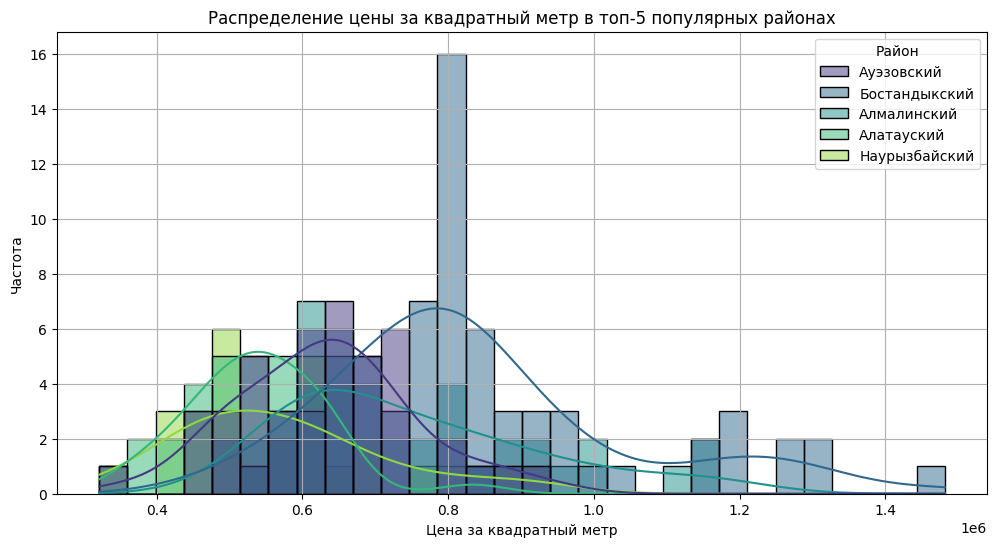

In [429]:
# Сравните распределение цены за квадратный метр в топ-5 популярных районах.


top_apartments_districts = apartments_clean['Район'].value_counts().head(5).index

filtered_data_apartments = apartments_clean[apartments_clean['Район'].isin(top_apartments_districts)]

plt.figure(figsize=(12, 6))
sns.histplot(
    data=filtered_data_apartments, 
    x='Цена(кв.м.)', 
    hue='Район', 
    bins=30, 
    kde=True, 
    palette='viridis'
)

plt.title('Распределение цены за квадратный метр в топ-5 популярных районах')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Частота')
#plt.legend(filtered_data_apartments['Район'])
plt.grid()

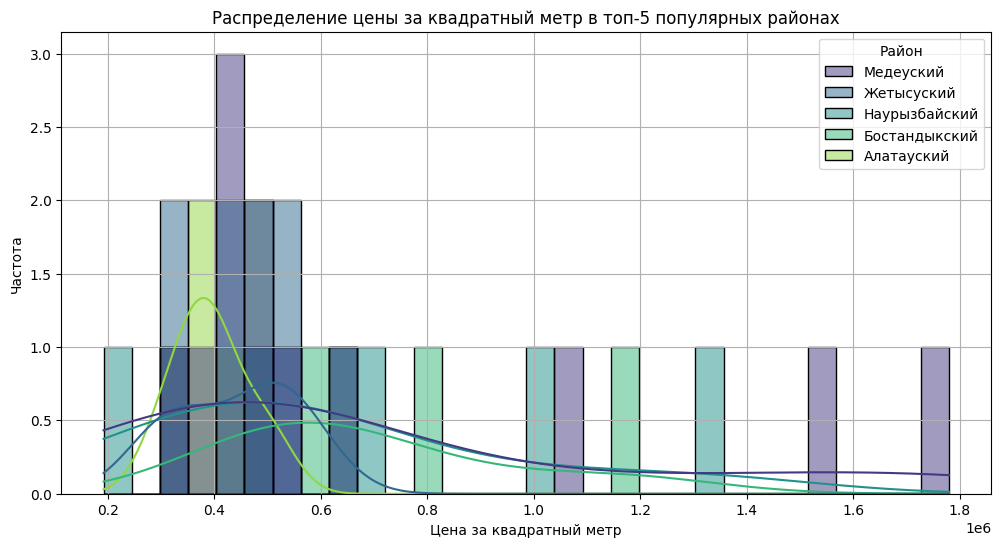

In [430]:
top_houses_districts = houses_clean['Район'].value_counts().head(5).index

filtered_data_houses = houses_clean[houses_clean['Район'].isin(top_houses_districts)]

plt.figure(figsize=(12, 6))
sns.histplot(
    data=filtered_data_houses, 
    x='Цена(кв.м.)', 
    hue='Район', 
    bins=30, 
    kde=True, 
    palette='viridis'
)

plt.title('Распределение цены за квадратный метр в топ-5 популярных районах')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Частота')
#plt.legend(filtered_data_houses['Район'])
plt.grid()

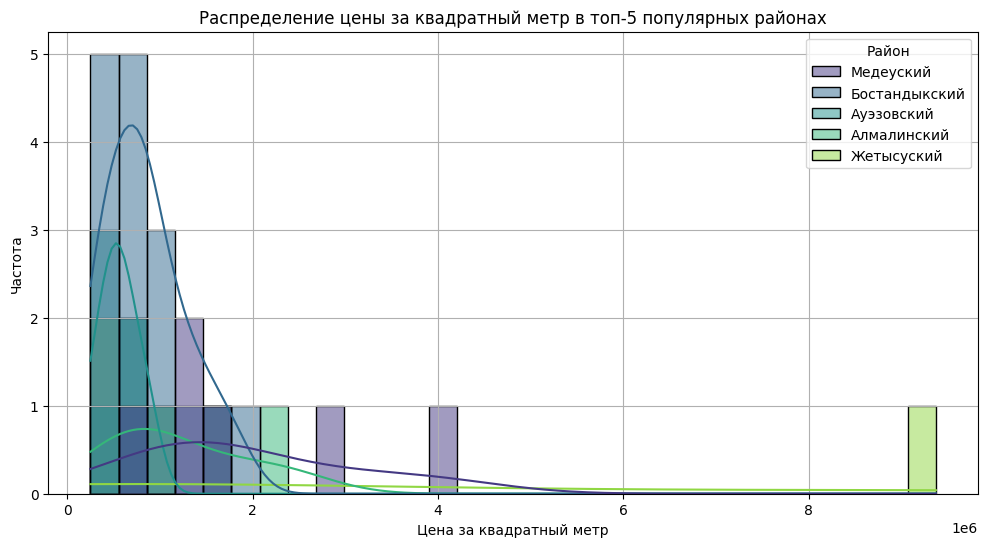

In [431]:
top_commerce_districts = commerce_clean['Район'].value_counts().head(5).index

filtered_data_commerce = commerce_clean[commerce_clean['Район'].isin(top_commerce_districts)]

plt.figure(figsize=(12, 6))
sns.histplot(
    data=filtered_data_commerce, 
    x='Цена(кв.м.)', 
    hue='Район', 
    bins=30, 
    kde=True, 
    palette='viridis'
)

plt.title('Распределение цены за квадратный метр в топ-5 популярных районах')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Частота')
#plt.legend(filtered_data_commerce['Район'])
plt.grid()

14. Анализ разброса цен по районам:

In [423]:
# Для каждой локации найдите минимальную, максимальную и медианную цену за квадратный метр.


apartments_clean.groupby('Район')[['Цена(кв.м.)']].agg(['min', 'max', 'median']).round(1)

Цена(кв.м.)                     
                      min        max    median
Район                                         
Алатауский       354558.6   833333.3  542253.5
Алмалинский      519791.7  1166666.7  702040.8
Ауэзовский       360000.0   938271.6  634004.1
Бостандыкский    485148.5  1481481.5  798995.1
Жетысуский       308411.2   641304.3  566176.5
Медеуский        396551.7  2009803.9  773333.3
Наурызбайский    321428.6   924302.8  552795.7
Турксибский      335937.5   676470.6  541935.5

In [424]:
houses_clean.groupby('Район')[['Цена(кв.м.)']].agg(['min', 'max', 'median']).round(1)

Цена(кв.м.)                     
                      min        max    median
Район                                         
Алатауский       309734.5   500000.0  375912.4
Алмалинский      300000.0   300000.0  300000.0
Ауэзовский       591549.3   718085.1  654817.2
Бостандыкский    475000.0  1160000.0  606777.0
Жетысуский       318181.8   561538.5  483333.3
Медеуский        322580.6  1779411.8  491935.5
Наурызбайский    192427.1  1340206.2  514162.9
Турксибский      386792.5   641848.5  427907.0

In [425]:
commerce_clean.groupby('Район')[['Цена(кв.м.)']].agg(['min', 'max', 'median']).round(1)

Цена(кв.м.)                    
                      min      max     median
Район                                        
Алатауский         657277   657277   657277.0
Алмалинский        536489  2342857   840000.0
Ауэзовский         247654   870968   536585.5
Бостандыкский      336000  1789474   775000.0
Жетысуский         326923  9375000   728022.0
Медеуский          681818  3899819  1540740.5
Наурызбайский      472222  1253439   708502.0
Турксибский        305556   497221   442968.0

15. Детализация аномалий:

In [397]:
# Найдите районы, где разброс цен за квадратный метр самый высокий (максимальная разница между минимальной и максимальной ценой).



price_stats_apartments = apartments_clean.groupby('Район')['Цена(кв.м.)'].agg(['min', 'max', 'median']).reset_index()

price_stats_apartments['Разброс'] = price_stats_apartments['max'] - price_stats_apartments['min']

price_stats_sorted = price_stats_apartments.sort_values(by='Разброс', ascending=False)

In [426]:
price_stats_sorted.round(1)

Район       min        max    median    Разброс
5      Медеуский  396551.7  2009803.9  773333.3  1613252.2
3  Бостандыкский  485148.5  1481481.5  798995.1   996333.0
1    Алмалинский  519791.7  1166666.7  702040.8   646875.0
6  Наурызбайский  321428.6   924302.8  552795.7   602874.2
2     Ауэзовский  360000.0   938271.6  634004.1   578271.6
0     Алатауский  354558.6   833333.3  542253.5   478774.7
7    Турксибский  335937.5   676470.6  541935.5   340533.1
4     Жетысуский  308411.2   641304.3  566176.5   332893.1

In [399]:
# Найдите районы, где разброс цен за квадратный метр самый высокий (максимальная разница между минимальной и максимальной ценой).



price_stats_houses = houses_clean.groupby('Район')['Цена(кв.м.)'].agg(['min', 'max', 'median']).reset_index()

price_stats_houses['Разброс'] = price_stats_houses['max'] - price_stats_houses['min']

price_stats_houses_sorted = price_stats_houses.sort_values(by='Разброс', ascending=False)

In [427]:
price_stats_houses_sorted.round(1)

Район       min        max    median    Разброс
5      Медеуский  322580.6  1779411.8  491935.5  1456831.1
6  Наурызбайский  192427.1  1340206.2  514162.9  1147779.1
3  Бостандыкский  475000.0  1160000.0  606777.0   685000.0
7    Турксибский  386792.5   641848.5  427907.0   255056.1
4     Жетысуский  318181.8   561538.5  483333.3   243356.6
0     Алатауский  309734.5   500000.0  375912.4   190265.5
2     Ауэзовский  591549.3   718085.1  654817.2   126535.8
1    Алмалинский  300000.0   300000.0  300000.0        0.0

In [401]:
price_stats_commerce = commerce_clean.groupby('Район')['Цена(кв.м.)'].agg(['min', 'max', 'median']).reset_index()

price_stats_commerce['Разброс'] = price_stats_commerce['max'] - price_stats_commerce['min']

price_stats_commerce_sorted = price_stats_commerce.sort_values(by='Разброс', ascending=False)

In [428]:
price_stats_commerce_sorted.round(1)

Район     min      max     median  Разброс
4     Жетысуский  326923  9375000   728022.0  9048077
5      Медеуский  681818  3899819  1540740.5  3218001
1    Алмалинский  536489  2342857   840000.0  1806368
3  Бостандыкский  336000  1789474   775000.0  1453474
6  Наурызбайский  472222  1253439   708502.0   781217
2     Ауэзовский  247654   870968   536585.5   623314
7    Турксибский  305556   497221   442968.0   191665
0     Алатауский  657277   657277   657277.0        0

## **Ваши Заключения:**

Это был довольно интересный опыт в анализе данных. На крыше.кз многим данным, к сожалению, не указаны районы, что привело к большой потере информации, особенно среди домов. 

Что касается самого анализа, то можно с уверенностью заявить, что самые дорогие районы для жизни это Медеуский и Бостандыкский 
(что вполне ожидаемо), а в основном дешевые - Турксибский, Алатауский и Жетысуйский. В коммерческой же недвижимости довольно дешевым районом помимо вышеуказанных является Ауэзовский, а дорогой - Жетысуйский. К сожалению не получилось провести нормальную 
аналитику по дням, потому что данные на сайте быстро обновляются и находятся там, как правило, 2-3 дня.

Корреляция цен с площадью показывает у квартир, домов и коммерческой 78%, 82%, 90%. В ценах за квадратный метр самыми дешевыми оказались 
дома, в то время как квартиры в этом плане оказываются очень невыгодными. 2х и 3х комнатные квартиры, в среднем, дороже чем домас таким же 
количеством комнат. Но для домов и коммерческой недвижимости характерно большее количество выбросов, чем для квартир. Интересно показала
себя этажность, самые дорогие оказались квартиры на 1, 2, 10 и 16 этажах. Цена планомерно увеличивается с количеством комнат. Показатель 
года постройки меня чуть удивил тем, что квартиры и коммерческие самые высокие в цене построенные в 2000-х годах, хотя у квартир все равно
много показателей со второй половины 20-го века. Дома же в основном ценятся, построенные в поледние 10 лет, особенно в 2015 почему то.

Самый наибольший разброс в цене у квартир наблюдается в Медеуском районе, с большим отрывом от 2-го места - Бостандыкского, который, как
оказалось, более стабильный в этом плане. У домов этой категории также с большим "преимуществом" побеждает Медеуский, но его "догоняет"
Наурызбайский. У коммерческой же "победителем" в этом плане выступает Жетысуйский в 2.8 раз превосходя 2е место - Медеуский.

В целом неудивительно, что вышли такие результаты, потому что считается престижным жить в центре города, из за чего Медеуский и Бостандыкский
райны лидируют в категориях квартиры и дома по цене, хотя как бы цены при этом все равно завышены, и корреляция показала, что здесь
совершенно противоположная зависимость спроса и предложения для квартир, чего не сказать о домах, хотя в целом, они стоят дороже, так как и 
площадь у них больше, и налоги с учетом земли кстати тоже. В обоих категориях Турксибский, Алатауский и Жетысуйский районы самые нежелательные, поэтому и цены там низкие. В коммерческой среде ситуация совершенно другая и к дорогим местам добавляются Жетысуйский, наверно там много делопроизводство и поэтому он в разы дороже. В заключение, если бы я выбирал где жить, то среди квартир выбирал бы Алмалинский, среди домов - Бостандыкский, а если бы открывал предприятие - то Ауэзовский районы, так как они сами по себе более менее, и цены там не так "кусаются", какв Медеуском (где я бы все равно хотел бы жить)и седи квартир выбирать 3-4 комнатные, а домов 5-7 комнат.




1.   Новый пункт
2.   Новый пункт

